<a id="index"></a>
# Resubmission Index
This index shows the specific areas that were updated for our resubmission. Please follow the links to each one in order to review.

* <a href="#ME2r">Modeling and Evaluation 2</a>
* <a href="#ME3r">Modeling and Evaluation 3</a>
* <a href="#ME5r">Modeling and Evaluation 5</a>
* <a href="#ME6r">Modeling and Evaluation 6</a>

# Lab 2 Resubmission
    MSDS 7331
    7/30/2017
    Anthony Dalton, Harsha Kommanapalli, Justin Beer, Hassan Azhar

# Index

This index will take you to the outlined sections as provided in the Grading Rubric for this Lab.

* <a href="#DP1">Data Preparation 1</a>
* <a href="#DP2">Data Preparation 2</a>
* <a href="#ME1">Modeling and Evaluation 1</a>
* <a href="#ME2">Modeling and Evaluation 2</a>
* <a href="#LRME3">Modeling and Evaluation 3 - Logistic Regression - EverDelinquent</a>
* <a href="#LRME4">Modeling and Evaluation 4 - Logistic Regression - EverDelinquent</a>
* <a href="#SVMME3">Modeling and Evaluation 3 - SVM - EverDelinquent</a>
* <a href="#SVMME4">Modeling and Evaluation 4 - SVM - EverDelinquent</a>
* <a href="#KNNME3">Modeling and Evaluation 3 - KNN - EverDelinquent</a>
* <a href="#KNNME4">Modeling and Evaluation 4 - KNN - EverDelinquent</a>
* <a href="#RFME3">Modeling and Evaluation 3 - Random Forest - EverDelinquent</a>
* <a href="#RFME4">Modeling and Evaluation 4 - Random Forest - EverDelinquent</a>
* <a href="#NBME3">Modeling and Evaluation 3 - Naive Bayes - EverDelinquent</a>
* <a href="#NBME4">Modeling and Evaluation 4 - Naive Bayes - EverDelinquent</a>
* <a href="#LRME3C">Modeling and Evaluation 3 - Logistic Regression - CreditRange</a>
* <a href="#LRME4C">Modeling and Evaluation 4 - Logistic Regression - CreditRange</a>
* <a href="#SVMME3C">Modeling and Evaluation 3 - SVM - CreditRange</a>
* <a href="#SVMME4C">Modeling and Evaluation 4 - SVM - CreditRange</a>
* <a href="#KNNME3C">Modeling and Evaluation 3 - KNN - CreditRange</a>
* <a href="#KNNME4C">Modeling and Evaluation 4 - KNN - CreditRange</a>
* <a href="#RFME3C">Modeling and Evaluation 3 - Random Forest - CreditRange</a>
* <a href="#RFME4C">Modeling and Evaluation 4 - Random Forest - CreditRange</a>
* <a href="#NBME3C">Modeling and Evaluation 3 - Naive Bayes - CreditRange</a>
* <a href="#NBME4C">Modeling and Evaluation 4 - Naive Bayes - CreditRange</a>
* <a href="#ME5">Modeling and Evaluation 5</a>
* <a href="#ME6">Modeling and Evaluation 6</a>
* <a href="#Dep">Deployment</a>
* <a href="#EW">Exceptional Work</a>
* <a href="#EWR">Exceptional Work - Regression</a>
* <a href="#Ref">References</a>

<a id="DP1"></a>
<a href="#index">Back to Index</a>
# Data Preparation 1

    In this section of code we will define and prepare our variables, import the raw data, and format each variable
    accordingly. Also, we will define which variables need to be removed if any. In the following section we will 
    describe the final dataset we arrive at.

Freddie Mac has made available loan-level credit performance data on a portion of fully amortizing fixed-rate mortgages that the company purchased or guaranteed from 1999 to 2016. We are using the data for Loan-level origination, monthly loan performance, and actual loss data on a portion of the fully amortizing 30-year fixed-rate Single Family mortgages that Freddie Mac acquired with origination dates from 1999 to the Origination Cutoff Date.The Dataset is a “living” dataset, and as such may periodically be corrected or updated over time.

We joined the two files for 1999 Q1 Origination Data File and 1999 Q1 Monthly Performance Data File at http://www.freddiemac.com/research/datasets/sf_loanlevel_dataset.html by 'LOAN SEQUENCE NUMBER' to get our final file with a response variable for 'EverDelinquent' (Has the Loan ever been Delinquent? 0/1). The EverDelinquent field corresponds to never having been 30 days or more delinquent on the loan or having been 30 days or more delinquent on the loan at least once.

We will know if we have mined useful knowledge if we will have a statistically significant way of predicting the outcome variable EverDelinquent. We will take alpha = 0.05 to determine a statistically significant result.

The following table describes the variables that we were provided, will create, and will remove. In the next section we will describe this table in further detail.

| Provided Variables | Removed Variables | Created Variables
| :- | :- | :- 
|Credit Score | FirstPaymentDate | CreditRange
|FirstPaymentDate | MaturityDate | LTV_range
|FirstTimeHomebuyer | MSA | Repay_range
|MaturityDate | Occupancy | IsFirstTime
|MSA | Channel |
|MIP | PPM |
|Units | ProductType |
|Occupancy | PropertyState |
|OCLTV | PropertyType |
|DTI | NumBorrowers |
|OrigUPB | SellerName |
|LTV | ServicerName |
|OrigInterestRate | FirstTimeHomebuyer |
|Channel |  |
|PPM |  |
|ProductType |  |
|PropertyState |  |
|PropertyType |  |
|OrigLoanTerm |  |
|NumBorrowers |  |
|SellerName |  |
|ServicerName |  |
|EverDelinquent |  |
|MonthsDelinquent |  |
|MonthsInRepayment |  |

The following SQL code was used on the Freddie Mac downloaded data sets in order to merge them together. We then output the LoanExport.csv file that we use below.

Using the LoanExport.csv that was output from the SQL code, we now import and modify our dataset as needed.

In [1]:
# Import pandas as numpy and read in the LoanExport Dataset.
import pandas as pd
import numpy as np

# Read in CSV
df = pd.read_csv('LoanExport.csv', low_memory=False)

# Sometimes Python has errors reading the first column in CSV's so we renamed CreditScore to 'CS'
col_name =df.columns[0]
df=df.rename(columns = {col_name:'CS'})
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
CS                    291451 non-null int64
FirstPaymentDate      291451 non-null int64
FirstTimeHomebuyer    291451 non-null object
MaturityDate          291451 non-null int64
MSA                   291451 non-null object
MIP                   291451 non-null int64
Units                 291451 non-null int64
Occupancy             291451 non-null object
OCLTV                 291451 non-null int64
DTI                   291451 non-null int64
OrigUPB               291451 non-null int64
LTV                   291451 non-null int64
OrigInterestRate      291451 non-null float64
Channel               291451 non-null object
PPM                   291451 non-null object
ProductType           291451 non-null object
PropertyState         291451 non-null object
PropertyType          291451 non-null object
PostalCode            291451 non-null object
LoanSeqNum            291451 non-null obje

(291451, 28)

In [2]:
# Remove attributes that just are not useful
for col in ['FirstPaymentDate','MaturityDate','MSA',
            'Occupancy','Channel','ProductType','LoanSeqNum',
            'SellerName','PostalCode','ServicerName',
            'PropertyState','PPM','PropertyType','LoanPurpose',
            'NumBorrowers']:
    if col in df:
        del df[col]
# Removing NA's
df.dropna(inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291451 entries, 0 to 291450
Data columns (total 13 columns):
CS                    291451 non-null int64
FirstTimeHomebuyer    291451 non-null object
MIP                   291451 non-null int64
Units                 291451 non-null int64
OCLTV                 291451 non-null int64
DTI                   291451 non-null int64
OrigUPB               291451 non-null int64
LTV                   291451 non-null int64
OrigInterestRate      291451 non-null float64
OrigLoanTerm          291451 non-null int64
EverDelinquent        291451 non-null int64
MonthsDelinquent      291451 non-null int64
MonthsInRepayment     291451 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 31.1+ MB


(291451, 13)

In [3]:
# Investigate the unique values in the column
df.CS.unique()

array([  0, 335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471,
       476, 477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 64

In [4]:
# CS contains a 0 which the data definition states is actually 850.
# Let's convert all 0's to 850
df['CS'] = np.where(df['CS'] == 0, 850, df['CS'])
df.CS.unique()

array([850, 335, 342, 363, 366, 370, 375, 391, 396, 445, 462, 466, 471,
       476, 477, 478, 479, 481, 482, 483, 485, 486, 487, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
       518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
       531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
       544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
       557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
       596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
       609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 64

In [5]:
# Find the values in FirstTimeHomebuyer column
df.FirstTimeHomebuyer.unique()

array(['N', 'X', 'Y'], dtype=object)

In [6]:
# FirstTimeHomebuyer contains X's which stand for unknowns, i.e. Nulls. 
# Need to remove all rows that do not have a valid answer, Y/N, as they are not useful to our research.
df = df[df.FirstTimeHomebuyer != 'X']
df.FirstTimeHomebuyer.unique()

array(['N', 'Y'], dtype=object)

In [7]:
# Check the row and column count of our dataset to see how many rows were just removed.
df.shape

(213436, 13)

In [8]:
# Count values in FirstTimeHomebuyer
df['FirstTimeHomebuyer'].value_counts()

N    184154
Y     29282
Name: FirstTimeHomebuyer, dtype: int64

In [9]:
# Rename FirstTimeHomebuyer to IsFirstTime
df = df.rename(columns = {'FirstTimeHomebuyer':'IsFirstTime'})
# Convert Y/N to 1 or 0 and then count values again to ensure they match
df['IsFirstTime'] = np.where(df['IsFirstTime'] == 'Y', 1, 0)
df['IsFirstTime'].value_counts()

0    184154
1     29282
Name: IsFirstTime, dtype: int64

In [10]:
# Find the values in MIP column
df.MIP.unique()

array([25,  0, 30, 12, 35, 29, 17, 18, 20, 22,  6, 14, 33, 16, 52, 36, 28,
       11, 45, 27, 10, 50, 47,  7, 24, 15, 37, 32, 26,  1, 13, 21, 23, 55,
        4], dtype=int64)

In [11]:
# Find the values in Units column
df.Units.unique()
print('Dataframe shape:', df.shape)
df['Units'].value_counts()

Dataframe shape: (213436, 13)


1    209501
2      3242
3       346
4       345
0         2
Name: Units, dtype: int64

In [12]:
# Units = 0 means that we do not have data on this so it is really a Null value, removing those rows.
df = df[df.Units != 0]
print('Dataframe shape:', df.shape)
df['Units'].value_counts()

Dataframe shape: (213434, 13)


1    209501
2      3242
3       346
4       345
Name: Units, dtype: int64

In [13]:
# Find values in OCLTV
df.OCLTV.unique()
# The OCLTV values check out here.

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  48,  50,
        51,  67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  30,
        24,  34,  37,  42,  65,  31, 100,   7,  38,  39,  16,  41,  33,
        92,  40,  35,  56,  22,  28,  43,  47,  49,  98,  29,  45,  25,
       103,  10,  18,  23,  20,  15, 102, 101,  14,  21,  27, 105,  19,
         8,   0, 104,  17, 110,  99,  12,   6,  13,   9,  11], dtype=int64)

In [14]:
# Find values in DTI
df.DTI.unique()
# The DTI values check out here.

array([27, 17, 16, 14, 18, 40, 21, 38, 19, 23, 45, 28, 29, 15, 43, 25, 24,
       26, 20, 35, 46, 39, 33, 48, 30, 31, 22, 56, 32, 12,  6, 37, 36, 42,
       34, 11, 41,  8, 44, 55,  0, 51, 10,  7, 47,  9, 13, 65, 54,  2, 53,
       57,  5,  3,  4, 50, 59, 49, 52, 64, 60, 58,  1, 61, 62, 63], dtype=int64)

In [15]:
# Find values in OrigUPB
df.OrigUPB.unique()
# The OrigUPB values check out here.

array([117000, 109000,  88000, 160000, 207000, 111000,  55000,  35000,
       126000, 200000,  70000,  93000,  79000,  54000,  80000, 231000,
       145000, 187000, 148000,  90000,  65000,  86000, 122000, 157000,
        94000,  63000,  50000, 100000, 191000, 204000, 222000, 189000,
        57000, 202000, 137000,  56000, 140000,  18000,  76000,  77000,
       151000, 118000, 182000,  98000,  89000, 172000,  82000, 240000,
       102000, 173000,  51000, 169000, 101000, 152000, 141000,  47000,
       128000, 133000, 135000, 115000, 144000, 146000, 212000, 176000,
       214000, 190000, 227000,  99000,  83000,  49000,  29000, 124000,
       132000, 150000, 300000,  95000, 149000, 162000, 226000, 110000,
       112000, 219000, 236000,  67000, 195000, 164000, 198000,  60000,
       194000, 147000, 104000,  72000, 183000, 154000, 179000,  66000,
       210000,  46000,  96000, 225000, 156000,  45000, 235000, 113000,
       139000,  74000,  68000,  69000, 238000, 142000,  73000,  48000,
      

In [16]:
# Find values in LTV
df.LTV.unique()
# The LTV values check out here.

array([ 89,  73,  75,  76,  78,  90,  95,  80,  77,  85,  93,  70,  74,
        79,  72,  62,  44,  32,  64,  91,  53,  69,  60,  54,  52,  84,
        68,  36,  55,  96,  97,  46,  58,  63,  83,  87,  94,  48,  50,
        51,  67,  86,  81,  66,  71,  82,  88,  26,  59,  57,  61,  30,
        24,  34,  37,  42,  65,  31,   7,  38,  39,  16,  41,  33,  92,
        40,  35,  56,  22,  28,  43,  47, 100,  49,  98,  29,  45,  25,
        10,  18,  23,  20,  15, 103,  14,  21,  27,  19,   8,   0,  17,
        12,   6,  13,   9,  11], dtype=int64)

In [17]:
# Find values in OrigInterestRate
df.OrigInterestRate.unique()
# The values check out here since we see that pandas imported this column as a float type.

array([  6.75 ,   6.5  ,   6.875,   7.125,   7.   ,   7.25 ,   6.625,
         7.75 ,   7.2  ,   7.5  ,   7.625,   7.875,   6.25 ,   8.125,
         7.15 ,   7.375,   6.375,   8.75 ,   7.1  ,   7.05 ,   6.95 ,
         8.   ,   8.625,   8.375,   8.5  ,   6.125,   6.   ,   5.875,
         8.25 ,   8.99 ,   5.625,   9.   ,   5.125,   5.25 ,   9.125,
         6.99 ,   5.375,   8.365,   8.875,   6.975,   7.3  ,   7.313,
         9.625,   9.25 ,   5.75 ,   7.85 ,   8.695,   4.875,   7.775,
         7.29 ,   7.405,   9.5  ,   9.375,   9.75 ,   7.13 ,   5.99 ,
         6.999,   7.055,   7.09 ,   6.785,   7.08 ,   7.025,   7.7  ,
         7.58 ,  10.5  ,   7.55 ,   7.445,   9.875,   6.85 ,   6.925,
         6.9  ,   8.37 ,   7.095,   7.19 ,   7.456,   7.675,   9.675,
         7.475,   7.22 ,   7.17 ,   8.7  ,   7.301,   8.9  ,  10.   ,
         5.5  ,   6.62 ,   7.325,  10.375,   7.8  ,   7.4  ,  10.85 ,
         7.185,   7.245,  11.5  ,   6.94 ,   6.87 ,   7.65 ,   7.312,
         7.28 ,   7.

In [18]:
# Find values in OrigLoanTerm
df.OrigLoanTerm.unique()
# The OrigLoanTerm values check out here.

array([360, 345, 306, 335, 322, 327, 358, 355, 356, 354, 346, 344, 348,
       313, 316, 353, 319, 332, 336, 338, 312, 328, 351, 333, 359, 331,
       337, 334, 357, 330, 350, 341, 343, 325, 326, 324, 347, 352, 329,
       339, 309, 317, 349, 342, 304, 310, 340, 301, 305, 315, 323, 321,
       320, 302, 314, 318, 308, 303, 307, 361, 311], dtype=int64)

In [19]:
# Find values in EverDelinquent
df.EverDelinquent.unique()
# The EverDelinquent values check out here.

array([0, 1], dtype=int64)

In [20]:
# Find values in MonthsInRepayment
df.MonthsInRepayment.unique()
# The MonthsInRepayment values check out here.

array([ 52, 144,  67,  35,  54,  42,  44,  64, 212,  37,  47,  53,  55,
        66,  26,  38,  36,  39,  40,  11, 176,  46, 197, 210,  56, 118,
        63,  24,  28,  91,  50,  22, 211, 199,  23,  30, 125,  41,  76,
        49,  18,  19,  43,  60,  83,  95,  29,  45,  13,   6,  48,  62,
        14,  15, 111,  51,  17,  75,  58,  27,  10,  31, 133, 165, 156,
        33,  68, 205,  57, 159,  81, 191, 194, 114,  59, 100, 134, 128,
        71,   7,  65,  74,  79, 174, 195, 151,  34, 149,  21,  12, 137,
       130,  69,  70, 173, 166,  61, 160,  20, 178,   3,  72, 147,   2,
        32, 164, 139, 108, 148,  92, 209, 102,  87,  94,  73, 123,  16,
       142,   1, 172, 109, 141, 175, 103, 168,   5, 155, 177, 158, 138,
        25, 110,  98,  84, 136,   8, 121, 179,   4, 154, 161, 157, 150,
        80, 170,  77,   9, 183,  93, 143, 162, 126,  89, 208, 184,  82,
       145, 117, 101, 122, 107, 193,  85,  78, 169, 104, 131, 140, 163,
       112, 206, 135, 132, 124, 186, 127, 189, 190, 198, 192, 16

In [21]:
# Create new variable for Credit Range since that is commonly what is looked at in the industry.
# New values = Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900)
df['CreditRange'] = pd.cut(df.CS,[550,650,700,750,1e6],4,labels=[1,2,3,4])
df.CreditRange.unique()

[4.0, NaN, 1.0, 2.0, 3.0]
Categories (4, int64): [1 < 2 < 3 < 4]

In [22]:
df['CreditRange'].value_counts()

3    72678
4    57183
2    54763
1    28284
Name: CreditRange, dtype: int64

In [23]:
# Create new variable for LTV Range
df['LTV_range'] = pd.cut(df.LTV,[0,25,50,1000],3,labels=['Low','Medium','High'])
df.LTV_range.unique()

[High, Medium, Low, NaN]
Categories (3, object): [High < Low < Medium]

In [24]:
# We get a NaN null return as a possible value
# Checking to ensure this is accurate
print('Is there a Null value in LTV?', df['LTV_range'].isnull().values.any())
print('Dataframe shape:', df.shape)
df['LTV_range'].value_counts()

Is there a Null value in LTV? True
Dataframe shape: (213434, 15)


High      198868
Medium     13202
Low         1361
Name: LTV_range, dtype: int64

In [25]:
# We need to find where these 3 Nan values are.
inds = pd.isnull(df).any(1).nonzero()[0]
pd.isnull(df).any(1).nonzero()[0]

array([   985,    986,    987,    988,    989,    990,    991,    992,
          993,    994,    995,    996,    997,    998,    999,   1000,
         1001,   1002,   1003,   1004,   1005,   1006,   1007,   1008,
         1009,   1010,   1011,   1012,   1013,   1014,   1015,   1016,
         1017,   1018,   1019,   1020,   1021,   1022,   1023,   1024,
         1025,   1026,   1027,   1028,   1029,   1030,   1031,   1032,
         1033,   1034,   1035,   1036,   1037,   1038,   1039,   1040,
         1041,   1042,   1043,   1044,   1045,   1046,   1047,   1048,
         1049,   1050,   1051,   1052,   1053,   1054,   1055,   1056,
         1057,   1058,   1059,   1060,   1061,   1062,   1063,   1064,
         1065,   1066,   1067,   1068,   1069,   1070,   1071,   1072,
         1073,   1074,   1075,   1076,   1077,   1078,   1079,   1080,
         1081,   1082,   1083,   1084,   1085,   1086,   1087,   1088,
         1089,   1090,   1091,   1092,   1093,   1094,   1095,   1096,
      

In [26]:
# Drop the specific rows with Nan for LTV_range as this will be an issue later on.
# I was unable to find a different way to get rid of these Nan's.
indexes_to_keep = set(range(df.shape[0])) - set(inds)
df = df.take(list(indexes_to_keep))
print('Is there a Null value in LTV?', df['LTV_range'].isnull().values.any())
print('Dataframe shape:', df.shape)
df['LTV_range'].value_counts()

Is there a Null value in LTV? False
Dataframe shape: (212905, 15)


High      198358
Medium     13186
Low         1361
Name: LTV_range, dtype: int64

In [27]:
# Create new variable Repay range
df['Repay_range'] = pd.cut(df.MonthsInRepayment,[0,48,96,144,192,240],5,
                           labels=['0-4yrs','4-8yrs','8-12yrs', '12-16yrs', '16-20yrs'])
print('Dataframe shape:', df.shape)
print('Repay_range values:', df.Repay_range.unique())
df['Repay_range'].value_counts()

Dataframe shape: (212905, 16)
Repay_range values: [4-8yrs, 8-12yrs, 0-4yrs, 16-20yrs, 12-16yrs]
Categories (5, object): [0-4yrs < 12-16yrs < 16-20yrs < 4-8yrs < 8-12yrs]


0-4yrs      108653
4-8yrs       73488
8-12yrs      13885
12-16yrs      8728
16-20yrs      8151
Name: Repay_range, dtype: int64

In [28]:
# Final check of our dataframe before moving on.
print('Dataframe shape:', df.shape)
print('Are there any null values in our dataframe (T/F)?', df.isnull().values.any())
df.info()

Dataframe shape: (212905, 16)
Are there any null values in our dataframe (T/F)? False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 212905 entries, 0 to 291450
Data columns (total 16 columns):
CS                   212905 non-null int64
IsFirstTime          212905 non-null int32
MIP                  212905 non-null int64
Units                212905 non-null int64
OCLTV                212905 non-null int64
DTI                  212905 non-null int64
OrigUPB              212905 non-null int64
LTV                  212905 non-null int64
OrigInterestRate     212905 non-null float64
OrigLoanTerm         212905 non-null int64
EverDelinquent       212905 non-null int64
MonthsDelinquent     212905 non-null int64
MonthsInRepayment    212905 non-null int64
CreditRange          212905 non-null category
LTV_range            212905 non-null category
Repay_range          212905 non-null category
dtypes: category(3), float64(1), int32(1), int64(11)
memory usage: 22.5 MB


In [29]:
# Now that we have created the variables we want to investigate further let's group our dataframe by these ranges.
df_grouped = df.groupby(by=['CreditRange'])
df_grouped = df.groupby(by=['CreditRange','LTV_range'])
df_grouped = df.groupby(by=['Repay_range'])
df_grouped = df.groupby(by=['CreditRange','IsFirstTime','LTV_range','Repay_range'])
df_grouped.describe()

CS                         \
                                                 count        mean        std   
CreditRange IsFirstTime LTV_range Repay_range                                   
1           0           High      0-4yrs       11450.0  626.529956  19.843510   
                                  12-16yrs       909.0  625.511551  19.916542   
                                  16-20yrs      1177.0  625.493628  20.070331   
                                  4-8yrs        8280.0  627.101691  19.639019   
                                  8-12yrs       1279.0  626.274433  20.232272   
                        Low       0-4yrs          17.0  627.529412  19.824599   
                                  12-16yrs         2.0  608.000000  35.355339   
                                  16-20yrs         1.0  631.000000        NaN   
                                  4-8yrs          13.0  635.384615  13.859644   
                                  8-12yrs          3.0  637.333333   7.094599   
                        Medium    0-4yrs         286.0  624.125874  20.164018   
                                  12-16yrs        39.0  624.128205  24.192408   
                                  16-20yrs        47.0  619.085106  26.227955   
                                  4-8yrs         210.0  626.152381  19.763085   
                                  8-12yrs         50.0  624.380000  23.455464   
            1           High      0-4yrs        2253.0  625.074567  20.676969   
                                  12-16yrs       187.0  625.336898  19.827722   
                                  16-20yrs       222.0  624.815315  18.847738   
                                  4-8yrs        1599.0  625.818637  19.879100   
                                  8-12yrs        227.0  624.312775  19.971306   
                        Low       8-12yrs          1.0  596.000000        NaN   
                        Medium    0-4yrs           7.0  631.571429  12.488090   
                                  12-16yrs         3.0  629.333333   6.027714   
                                  16-20yrs         4.0  616.500000  16.842407   
                                  4-8yrs          16.0  621.125000  15.239751   
                                  8-12yrs          1.0  639.000000        NaN   
2           0           High      0-4yrs       22976.0  677.335306  14.428621   
                                  12-16yrs      1649.0  677.235294  14.628795   
                                  16-20yrs      1939.0  675.659103  14.436539   
                                  4-8yrs       15655.0  676.947684  14.440027   
...                                                ...         ...        ...   
4           0           High      0-4yrs       21770.0  771.096785  16.729990   
                                  12-16yrs      2025.0  775.115556  17.963305   
                                  16-20yrs      1402.0  774.682596  18.945351   
                                  4-8yrs       14609.0  771.910398  16.944185   
                                  8-12yrs       3469.0  773.554338  16.923832   
                        Low       0-4yrs         334.0  777.943114  17.064259   
                                  12-16yrs        73.0  782.082192  14.416188   
                                  16-20yrs        49.0  783.040816  19.201735   
                                  4-8yrs         235.0  777.893617  15.562438   
                                  8-12yrs        105.0  779.438095  15.772373   
                        Medium    0-4yrs        2871.0  775.854406  16.458555   
                                  12-16yrs       448.0  779.410714  16.650401   
                                  16-20yrs       307.0  777.895765  17.064532   
                                  4-8yrs        2285.0  775.845077  16.568163   
                                  8-12yrs        704.0  777.308239  16.119050   
            1           High      0-4yrs        3064.0  771.980418  20.469600   
  

In [30]:
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[['IsFirstTime','EverDelinquent']] = df[['IsFirstTime','EverDelinquent']]
df.dropna(inplace=True)

In [31]:
# Slicing the CreditScore
df_imputed['CreditRange'] = pd.cut(df_imputed.CS,[550,650,700,750,1e6],4,labels=[1,2,3,4]) # this creates a new variable
df_imputed.CreditRange.describe()

count     212905
unique         4
top            3
freq       72678
Name: CreditRange, dtype: int64

In [32]:
# Slicing the LTV
df_imputed['LTV_range'] = pd.cut(df_imputed.LTV,[0,25,50,110],3,labels=['low','medium','high']) # this creates a new variable
df_imputed.LTV_range.describe()

count     212905
unique         3
top         high
freq      198358
Name: LTV_range, dtype: object

In [33]:
# Taking slices of the MonthsInRepayment
df_imputed['Repay_range'] = pd.cut(df_imputed.MonthsInRepayment,[0,48,96,144,192,240],5,labels=['0-4yrs','4-8yrs','8-12yrs', '12-16yrs', '16-20yrs'])
df_imputed.Repay_range.describe()

count     212905
unique         5
top       0-4yrs
freq      108653
Name: Repay_range, dtype: object

In [34]:
df_imputed.head()
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212905 entries, 0 to 291450
Data columns (total 16 columns):
CS                   212905 non-null int64
MIP                  212905 non-null int64
Units                212905 non-null int64
OCLTV                212905 non-null int64
DTI                  212905 non-null int64
OrigUPB              212905 non-null int64
LTV                  212905 non-null int64
OrigInterestRate     212905 non-null float64
OrigLoanTerm         212905 non-null int64
EverDelinquent       212905 non-null int64
MonthsDelinquent     212905 non-null int64
MonthsInRepayment    212905 non-null int64
IsFirstTime          212905 non-null int32
CreditRange          212905 non-null category
LTV_range            212905 non-null category
Repay_range          212905 non-null category
dtypes: category(3), float64(1), int32(1), int64(11)
memory usage: 22.5 MB


In [35]:
# Now let's clean up the dataset
#store for regression
df_imputed_reg = df_imputed

#store for classification of credit score - Task 2
df_imputed_cs = df_imputed

if 'FirstTimeHomebuyer' in df_imputed_cs:
    del df_imputed_cs['FirstTimeHomebuyer']
        
for col in ['LTV_range', 'Repay_range']:
    if col in df_imputed_cs:
        del df_imputed_cs[col]
        
df_imputed_cs = df_imputed_cs.sample(10000)
df_imputed_cs.info()
df_imputed_cs.head()

if 'FirstTimeHomebuyer' in df_imputed_reg:
    del df_imputed_reg['FirstTimeHomebuyer']
        
for col in ['CreditRange','LTV_range', 'Repay_range']:
    if col in df_imputed_reg:
        del df_imputed_reg[col]
        
df_imputed_reg = df_imputed_reg.sample(10000)
df_imputed_reg.info()
df_imputed_reg.head()

if 'FirstTimeHomebuyer' in df_imputed:
    del df_imputed['FirstTimeHomebuyer'] # if 'FirstTimeHomebuyer' column still exists, delete it (as we created an IsFirstTime column)

#Removing Ranges: they are represented by their constituent variables anyway and 'MonthsDelinquent' as it is highly correlated to 'EverDelinquent', in fact we made 'Everdelinquent' from 'MonthsDelinquent' 
for col in ['CreditRange','LTV_range', 'Repay_range','MonthsDelinquent']:
    if col in df_imputed:
        del df_imputed[col]  


df_imputed = df_imputed.sample(10000)
df_imputed.info()
df_imputed.head()

df_imputed_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9315 to 54578
Data columns (total 14 columns):
CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                10000 non-null int64
OCLTV                10000 non-null int64
DTI                  10000 non-null int64
OrigUPB              10000 non-null int64
LTV                  10000 non-null int64
OrigInterestRate     10000 non-null float64
OrigLoanTerm         10000 non-null int64
EverDelinquent       10000 non-null int64
MonthsDelinquent     10000 non-null int64
MonthsInRepayment    10000 non-null int64
IsFirstTime          10000 non-null int32
CreditRange          10000 non-null category
dtypes: category(1), float64(1), int32(1), int64(11)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 120453 to 115282
Data columns (total 13 columns):
CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                1

In [36]:
df_imputed_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 120453 to 115282
Data columns (total 13 columns):
CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                10000 non-null int64
OCLTV                10000 non-null int64
DTI                  10000 non-null int64
OrigUPB              10000 non-null int64
LTV                  10000 non-null int64
OrigInterestRate     10000 non-null float64
OrigLoanTerm         10000 non-null int64
EverDelinquent       10000 non-null int64
MonthsDelinquent     10000 non-null int64
MonthsInRepayment    10000 non-null int64
IsFirstTime          10000 non-null int32
dtypes: float64(1), int32(1), int64(11)
memory usage: 1.0 MB


<a id="DP2"></a>
<a href="#index">Back to Index</a>
# Data Preparation 2

    In this section we will briefly describe our finalized dataset that we created from the raw input data including any variables we found it necessary to create and formatting specifications.

We made these corrections to the raw dataset:

* Missing character representation of variables were replaced with 'X'.
* Missing variables in integer columns were replaced with '0'.
* Missing variables in floating length fields were replaced with '0.00'.
* Ignored data where current loan deliquncy status is 'R' = REO Acquisition as we are concerned with delinquencies.
* Ignored all non-numeric mortgage insurance premium fields as they weren't meaningful per the data element      dictionary specifications. 

You may download the finalized dataset here:

* https://drive.google.com/open?id=0B3IRH2wZKQh3dmIyQ0pHOE44Z2M

This table is a full disclosure of the variables that were provided, removed, or created along with their definitions and values.

| Variables | Modified? | Definition | Values
| :- | :- | :- | :- | :- 
| CreditScore | Yes, renamed to CS | A number summarizing the borrower’s creditworthiness. | 301-850, 0 if 850 
| MIP | No | The % of loss coverage on the loan. | 1-55%, 0 = No MIP
| Units | No | Shows whether the mortgage is a 1,2,3, or 4 unit property. | 1-4 units, X = Unknown
| OCLTV | No | Original Combined Loan-to-Value ratio [Reference LTV for calculation] | 0-200%, X = Unknown
| DTI | No | Original Debt-to-Income ratio. | 0-65%, X = >65 or Unknown
| OrigUPB | No | The unpaid balance of the mortgage on the note date. | Numeric rounded to nearest 1,000
| LTV | No | The Loan to Value ratio [orig mortgage amount / (lesser of appraised value or purchase price)] | 6-105%, X = Unknown
| OrigInterestRate | No | The original note rate as indicated on the mortgage note. | Numeric
| OrigLoanTerm | No | The number of scheduled monthly payments based on the FirstPaymentDate and MaturityDate. | Integer
| EverDelinquent | No | Has the loan has ever been 30 days or more delinquent? | 0 = No, 1 = Yes
| MonthsInRepayment | No | The number of months that the Loan premium has been paid. | Integer
| CreditRange | Created | Made this from CreditScore (CS). | Bad, Good, Very Good, Excellent
| LTV_range | Created | Made this from LTV. | Low, Medium, High
| Repay_range | Created | Made this from MonthsInRepayment. | 0-4yrs, 4-8yrs, 8-12yrs, 12-16yrs, 16-20yrs
| IsFirstTime | Created | Is the purchaser a First Time Homebuyer? | Y or N
| FirstTimeHomebuyer | Removed | Not necessary as we created IsFirstTime variable from this one. |
| MonthsDelinquent | Removed | Not necessary, highly correlated to EverDelinquent |
| FirstPaymentDate | Removed | Not necessary. |
| MaturityDate | Removed | Not necessary. |
| MSA | Removed | Not necessary. |
| Occupancy | Removed | Not necessary. |
| Channel | Removed | Not necessary. |
| PPM | Removed | Not necessary. |
| ProductType | Removed | Not necessary. |
| PropertyState | Removed | Not necessary. |
| PropertyType | Removed | Not necessary. |
| NumBorrowers | Removed | Not necessary. |
| SellerName | Removed | Not necessary. |
| ServicerName | Removed | Not necessary. |

<a id="ME1"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 1

    In this section we will explain the evaluation metrics chosen.

We have decided to use Accuracy and Precision as our evaluation metrics for each model. We did not want to use Accuracy alone as we may have a heavy weight in the EverDelinquent response which causes an overfitting model. Using both Accuracy and Precision will provide us with the insight we need into our models validity.

We have decided to use Accuracy and Precision as our evaluation metrics for each model. We did not want to use Accuracy alone as we may have a heavy weight in the EverDelinquent response which causes an overfitting model. Using both Accuracy and Precision will provide us with the insight we need into our models validity.
Accuracy:
Proportion of all predictions that are correct. Accuracy is a measurment of how good a model is.
accuracy= (TP+FN) / (TP+FN+TP+TN ) = correct predictions / all predictions
Precision:
Proportion of all positive predictions that are correct. Precision is a measure of how many positive predictions were actual positive observations.
Precision= TP / TP+FP = positive predicted correctly / all positive predictions
Where :
True Positive (TP): Observation is positive, and is predicted to be positive.
False Negative (FN): Observation is positive, but is predicted negative.
True Negative (TN): Observation is negative, and is predicted to be negative.
False Positive (FP): Observation is negative, but is predicted positive.
https://chrisalbon.com/machine-learning/precision_recall_and_F1_scores.html

<a id="ME2"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 2

    In this section we will explain the method chosen for creating the training and test data and why we believe our method to be appropriate over others.
    
We have chosen to split our testing and training datasets using 3 iterations and splitting the data into 80% Testing data and 20% Training data. We chose this method so that we would have enough testing data to verify whether our models are working as expected.

Once we have created the testing and training datasets we will move onto our chosen classification models. We will then run 5 models on the training dataset, 5 models on the testing dataset, and then compare the results and performances between the two.

## Split Training and Testing

In [37]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'EverDelinquent' in df_imputed:
    y = df_imputed['EverDelinquent'].values # get the labels we want
    del df_imputed['EverDelinquent'] # get rid of the class label
    
    X = df_imputed.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)
df_imputed.head()

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


,CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepayment,IsFirstTime
138338,713,0,1,75,33,98000,75,6.625,360,166,0
271626,780,0,1,65,28,136000,65,6.750,360,107,0
277891,785,25,1,90,28,72000,90,6.875,360,35,1
161151,725,0,1,69,17,187000,69,6.375,360,49,1
256742,771,0,1,80,36,106000,80,7.500,360,24,1


<a id="ME2r"></a>
<a href="#index">Back to Index</a>
### M&E 2: Resubmission
    Feedback: 3 fold cv is not sufficient without a very detailed explanation which is missing.

The purpose of performing folds for cross validation is to compare the testing and training data to ensure that there is no overfitting. For example, if your training data set is returning an accuracy of 80% when fitted with your model and then you apply that model to your testing data set and there is then an accuracy of 30%, or significantly less than 80%, we can conclude that the model is overfitting our training data. In other words, our model is being created on a set of data that is not sufficiently random or distributed enough. The model is being trained with a very specific answer set and once we take that model to the "real world", our larger testing set, it underperforms significantly due to it being trained improperly.

In the case of overfitting, the model is useless in reality. We can very easily create a model that perfectly fits our training data. However, what use is there in the model past that? Typically, there would be no use in prediction or future classification as it would be inaccurate in a real-time application and only accurate historically. For our mortgage data, historical accuracy is of less importance than real-time accuracy as we are attempting to correctly classify a mortgage application of whether it will be delinquent or not at the time of application.

For our data set we performed a 3 fold testing/training split. The reason we used only 3 folds is due to using 5 different models on our data. If overfitting is occurring due to the number of folds then every model will be affected. Also, we wanted to see if any of the models employed were more susceptible to overfitting than others. In the Modeling and Evaluation sections 3 & 4 we did not find any particular model susceptible to overfitting nor did we see any overfitting between the training and testing data sets.

<a id="ME3r"></a>
<a href="#index">Back to Index</a>
### M&E 3: Resubmission
    Feedback: Missing discussions on parameter adjustments for each algorithm and how your adjustments impact cv results. "Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithm!"
    
In the "Modeling and Evaluation 4 - Logistic Regression - EverDelinquent" section we created a slider bar so that you can adjust the parameters of the model easily. When adjusting the Cost parameter for this model we found that there was no significant gain in accuracy.


<a id="LRME3"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 3 - Logistic Regression - EverDelinquent

    In this section we will create our Logistic Regression model. Once created, we will explore how changing the 
    parameters for each model affects the model by our chosen metrics of Accuracy and Precision
    
 In this Logistic regression model, we are trying to create a high accuracy model capable of classifying a record whose details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime we know, into either delinquent [Everdelinquent = 1] or not delinquent [Everdelinquent =0 ], this is a very useful model that can be used by banks at the time of refinancing a loan or giving a new loan for the same borrower, the details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime for the borrower could change reguarly, so the model, if satisfactory, needs to be deployed in such a way that the it refreshes every day and the latest model needs to be used to classify/predict whether a borrower could lead to a delinquent loan.


In [38]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
    print(y_hat)

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("==== Iteration",iter_num," ====")
    print("Accuracy", acc )
    print("Confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

[0 0 0 ..., 0 1 0]
==== Iteration 0  ====
Accuracy 0.8025
Confusion matrix
 [[1539   48]
 [ 347   66]]
[0 0 0 ..., 0 0 0]
==== Iteration 1  ====
Accuracy 0.8105
Confusion matrix
 [[1556   45]
 [ 334   65]]
[0 0 0 ..., 0 0 0]
==== Iteration 2  ====
Accuracy 0.805
Confusion matrix
 [[1559   42]
 [ 348   51]]


After performing the three iterations of fitting the logistic regression to three different test and training sets we get very close to the same accuracy each time, approximately 80%. The LR model is doing a good job of predicting the class, in our case Ever Delinquent, using the data that we provided. 80% of the time the LR model is properly classifying the mortgage as to whether or not it has ever been delinquent.

<a id="LRME4"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 4 - Logistic Regression - EverDelinquent

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy and Precision.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For Logistic Regression we will analyze Accuracy and Precision of the model. The visualizations of the Confusion Matrix and the Logistic Regression Weights will be analyzed to provide insight into the model, its interpretation, and usefulness.

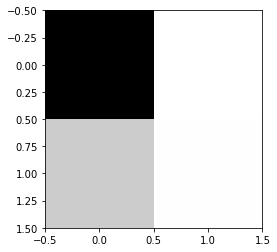

Accuracy 0.805
Confusion matrix
 [[1559   42]
 [ 348   51]]


In [39]:
import matplotlib.pyplot as plt
conf = mt.confusion_matrix(y_test,y_hat)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
print("Accuracy", acc )
print("Confusion matrix\n",conf)

The above confusion matrix provides us with an Accuracy of 80.5%. The model does a fairly good job of classifying whether or not a loan was delinquent. The precision for this model is (1559/(348+1559)) = 81.8% precise. With both Accuracy and Precision above 80%, our model does a good job of classifying our response variable EverDelinquent.

In [40]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[ 0.817   0.8135  0.8175]


In [41]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)
    
wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

<function __main__.lr_explor>

Running lr_explor doesn't display a significant gain when adjusting the 'C' value or the inverse of regulation strength.
Double check the accuracy of the training set using a different method to validate

In [42]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_train, y_train)

0.81274999999999997

In [43]:
y_train.mean()

0.19850000000000001

Weight interpretation
Okay, so now lets take the last trained model for logistic regression and try to interpret the weights for the model. Is there something about the weights that makes this model more interpretable?

In [44]:
# display the intercept
print ('Intercept value: ',lr_clf.intercept_)
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_imputed.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

Intercept value:  [  4.90520244e-05]
CS has weight of -0.0125332871958
MIP has weight of 0.00116985644569
Units has weight of 9.80793325945e-05
OCLTV has weight of 0.00180007132147
DTI has weight of 0.0046645551565
OrigUPB has weight of -1.79002858468e-06
LTV has weight of 0.00186098852798
OrigInterestRate has weight of 0.000629559515445
OrigLoanTerm has weight of 0.017680160513
MonthsInRepayment has weight of 0.0123021043233
IsFirstTime has weight of -8.51772688532e-05


In [45]:
# Weights of the Logistic Regression. 
import numpy
numpy.std(df_imputed, axis=0)

CS                      50.915371
MIP                     13.281822
Units                    0.194384
OCLTV                   15.407798
DTI                     11.303776
OrigUPB              54122.681373
LTV                     15.400177
OrigInterestRate         0.351799
OrigLoanTerm             2.120882
MonthsInRepayment       45.227646
IsFirstTime              0.353206
dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply to test
# train the model
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df_imputed.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.8045
[[1555   46]
 [ 345   54]]
CS has weight of -0.603516842146
OrigUPB has weight of -0.0688297547771
IsFirstTime has weight of -0.0363373880374
OCLTV has weight of -0.0175874523328
LTV has weight of 0.012899844098
OrigLoanTerm has weight of 0.027588264941
Units has weight of 0.029902511432
DTI has weight of 0.062205663065
MIP has weight of 0.0637404832485
OrigInterestRate has weight of 0.130122893215
MonthsInRepayment has weight of 0.562181407646


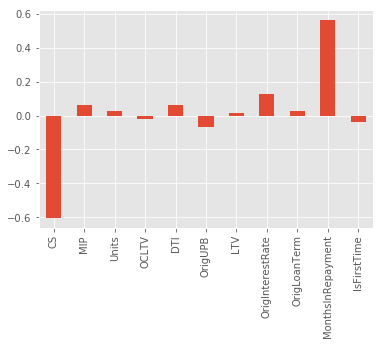

In [47]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(lr_clf.coef_[0],index=df_imputed.columns)
weights.plot(kind='bar')
plt.show()

The above chart shows the different Logistic Regression weights that have been calculated. We can see that the CS (CreditScore) and MonthsInRepayment are the two largest contributors to classifying our response EverDelinquent. CS has a negative relationship while MonthsInRepayment has a positive relationship with being delinquent. What this means is that as CS increases, with all others held constant, the likelihood of a delinquency drops. Whereas, with all others held constant, as MonthsInRepayment increases, the likelihood of a delinquency on the loan increases.

In [48]:
from sklearn.preprocessing import StandardScaler
# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)

from sklearn.pipeline import Pipeline
# you can apply the StandardScaler function inside of the cross-validation loop 
#  but this requires the use of PipeLines in scikit. 
#  A pipeline can apply feature pre-processing and data fitting in one compact notation
#  Here is an example!

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl),  # do this
                         ('logit_model', lr_clf)]) # and then do this

weights = []
# run the pipline cross validated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    # it is a little odd getting trained objects from a  pipeline:
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    

weights = np.array(weights)

In [49]:
import plotly
plotly.offline.init_notebook_mode() # run at the start of every notebook

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': df_imputed.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [50]:
# Removing MonthsDelinquent and running below
Xnew = df_imputed[['CS','MIP','Units','OCLTV', 'DTI','OrigUPB','LTV','OrigInterestRate','OrigLoanTerm','MonthsInRepayment','IsFirstTime']].values

weights = []
# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    piped_object.fit(Xnew[train_indices],y[train_indices])  # train object
    weights.append(piped_object.named_steps['logit_model'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['CS','MIP','Units','OCLTV', 'DTI','OrigUPB','LTV','OrigInterestRate','OrigLoanTerm','MonthsInRepayment','IsFirstTime'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars'}

plotly.offline.iplot(fig)

<a id="SVMME3"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 3 - SVM - EverDelinquent

    In this section we will create our SVM model. Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy and Precision.

[0 0 0 ..., 0 0 0]


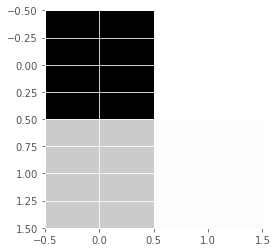

accuracy: 0.807
[[1566   35]
 [ 351   48]]


In [51]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn import svm

# train the model just as before
#svm_clf = svm.SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
# SVC with Kernel rbf or linear is taking for ever to run, hence switching to LinearSVC

svm_clf = svm.LinearSVC(C=0.5) # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

print(y_hat)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
print('accuracy:', acc )
print(conf)

### SVM

In this SVM model, we are trying to create a high accuracy model capable of classifying a record whose details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime we know, into either delinquent [Everdelinquent = 1] or not delinquent [Everdelinquent =0 ], this is a very useful model that can be used by banks at the time of refinancing a loan or giving a new loan for the same borrower, the details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime for the borrower could change reguarly, so the model, if satisfactory, needs to be deployed in such a way that the it refreshes every day and the latest model needs to be used to classify/predict whether a borrower could lead to a delinquent loan.


The SVM model Accuracy = 80.7% and the Precision = (1566/(1566+351)) = 81.7%

[0 0 0 ..., 0 0 0]


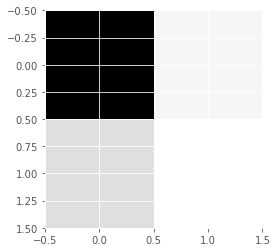

accuracy: 0.7755
[[1435  166]
 [ 283  116]]


In [52]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train_scaled, y_train)  # train object
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
y_hat = clf.predict(X_test_scaled) # get test set precitions
print(y_hat)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
print('accuracy:', acc )
print(conf)

### Stochastic Gradient Descent

The above Accuracy = 77.6% and the Precision = (1435/(1435+283)) = 83.5%

<a id="SVMME4"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 4 - SVM - EverDelinquent

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy and Precision.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For SVM we will analyze Accuracy and Precision. The visualizations of the Confusion Matrix and Support Vectors will be analyzed to provide insight into the model, its interpretation, and usefulness.

The different models that we have used had the following accuracies for each run truncated to three decimal places.
<pre><ul>
Support Vector Machines: Accuracy = 80.7%, Precision = 81.7%
Stochastic Gradient Descent: Accuracy = 77.6%, Precision = 83.5%</ul>

As can be seen the Accuracy and Precision of both the SVM and Stochastic Gradient Descent models, the SVM model is a better classifier of the EverDelinquent response. SVM is better because it has a higher accuracy, meaning it has classified more correctly while it's precision is marginally lower than Stochastic Gradient Descent. Both models ran quickly and there was no appreciable difference in performance. We will not move onto further analysis of our SVM models by looking at the chosen Support Vectors.

## Chosen Support Vectors for Classification Task

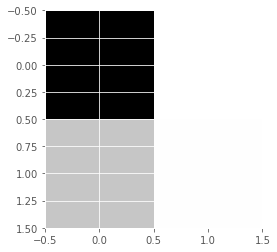

accuracy: 0.8065
[[1585   16]
 [ 371   28]]


In [53]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
print('accuracy:', acc )
print(conf)

In [54]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(3439, 11)
(3439,)
[1877 1562]


In [55]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors
# make a dataframe of the training data
df_tested_on = df_imputed.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['EverDelinquent'] = y[svm_clf.support_]
df_imputed['EverDelinquent'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 193462 to 232031
Data columns (total 12 columns):
CS                   3439 non-null int64
MIP                  3439 non-null int64
Units                3439 non-null int64
OCLTV                3439 non-null int64
DTI                  3439 non-null int64
OrigUPB              3439 non-null int64
LTV                  3439 non-null int64
OrigInterestRate     3439 non-null float64
OrigLoanTerm         3439 non-null int64
MonthsInRepayment    3439 non-null int64
IsFirstTime          3439 non-null int32
EverDelinquent       3439 non-null int64
dtypes: float64(1), int32(1), int64(10)
memory usage: 335.8 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



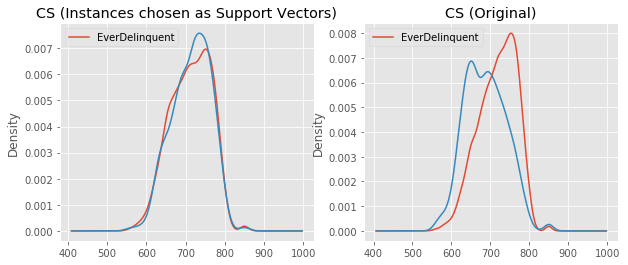

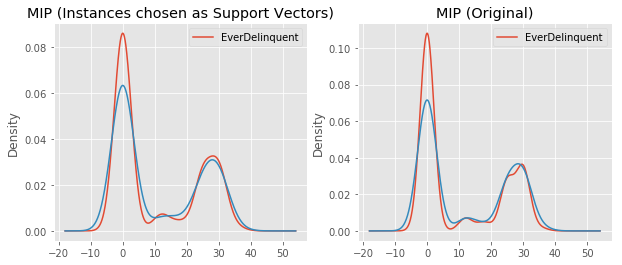

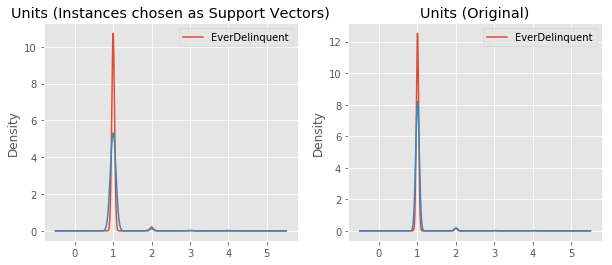

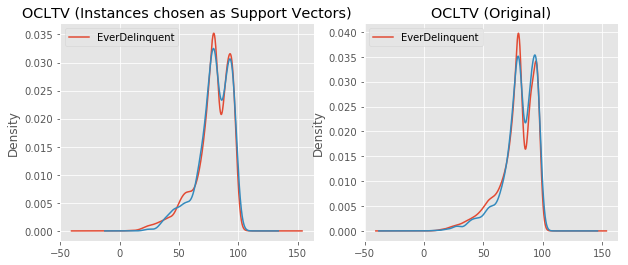

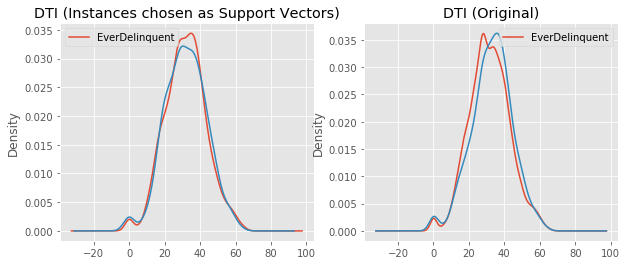

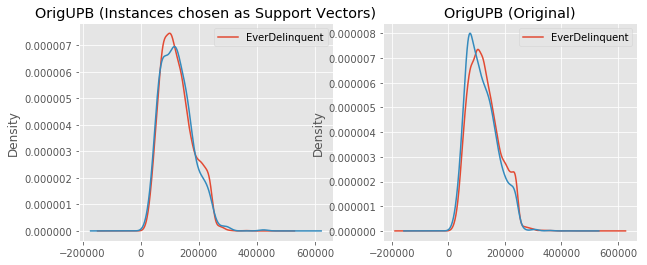

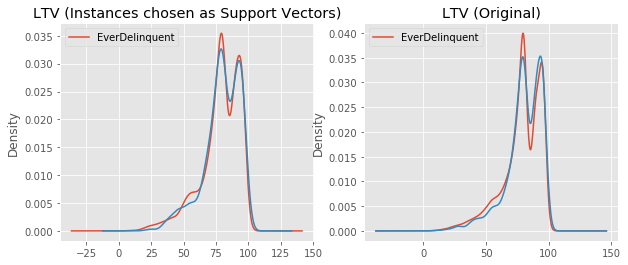

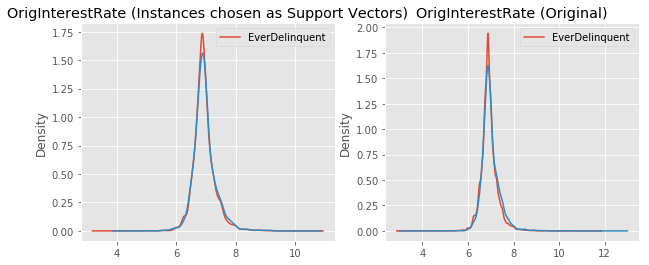

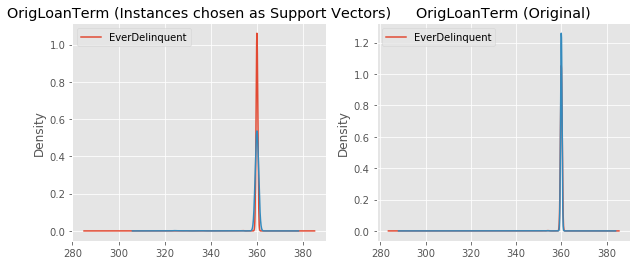

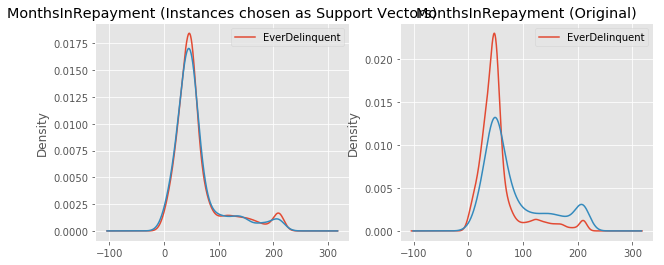

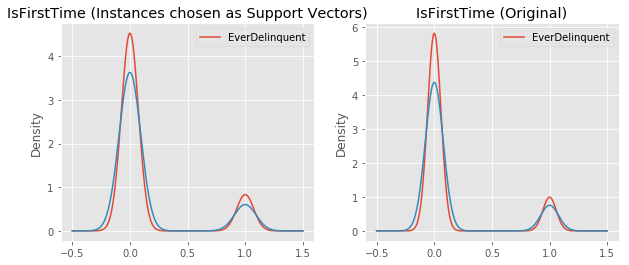

In [56]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['EverDelinquent'])
df_grouped = df_imputed.groupby(['EverDelinquent'])

# plot KDE of Different variables
vars_to_plot = ['CS','MIP','Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate',  'OrigLoanTerm', 'MonthsInRepayment', 'IsFirstTime']


for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['EverDelinquent'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['EverDelinquent'])
    plt.title(v+' (Original)')

We can see from the above chosen support vectors that they closely mimic the the distribution of the original data set. The chosen support vectors do not reach the maximums that the original data set does but this is expected behavior since the support vectors are acting to classify the information. Even with this, the support vectors distribution shape appears almost identical to the original data distribution for all variables. For the outcomes, we do see the usual support vector characteristic of lesser separation when compared to the original data.

The density estimation between the chosen support vector and original shows the largest variance between 'Monthsinrepayment' and 'DTI'. Without thinking of SVM and using simple thought, one would think that more 'Monthsinrepayment' would allow the record to have more likelihood of being delinquent. Also, a larger debt-to-income ratio, 'DTI', would allow for a higher delinquency rate. While the correlation of data elements isn't what causes the discrepancy between support vectors and original dataset, it is still interesting that these specific variables class boundary differences show up.

The discrepancy between the support vector and original are more present possibly because the support vector is tuning into the edge cases that exist in the data and or because of classification errors in the training set.

The largest contributors to the classification task of EverDelinquent are the MonthsInRepayment and DTI as seen in the support vectors.

<a id="KNNME3"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 3 - KNN - EverDelinquent

In this KNN classification model, we are trying to create a high accuracy model capable of classifying a record whose details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime we know, into either delinquent [Everdelinquent = 1] or not delinquent [Everdelinquent =0 ], this is a very useful model that can be used by banks at the time of refinancing a loan or giving a new loan for the same borrower, the details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime for the borrower could change reguarly, so the model, if satisfactory, needs to be deployed in such a way that the it refreshes every day and the latest model needs to be used to classify/predict whether a borrower could lead to a delinquent loan.



Let's start with a simple classifier and ten fold cross validation, calculating accuracy to start.

In [57]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'EverDelinquent' in df_imputed:
    y = df_imputed['EverDelinquent'].values # get the labels we want
    del df_imputed['EverDelinquent'] # get rid of the class label
    X = df_imputed.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn


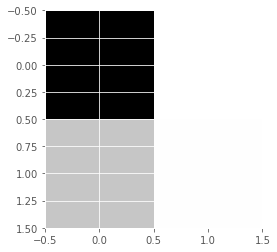

KNNaccuracy: 0.7715
[[1585   16]
 [ 371   28]]
Wall time: 2.47 s


In [58]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics as mt
yhat = np.zeros(y.shape) # we will fill this with predictions
scl = StandardScaler()
X = scl.fit_transform(X)
# create cross validation iterator
cv = StratifiedKFold(n_splits=10)
# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)
# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
print('KNNaccuracy:', total_accuracy )
print(conf)   

When we run KNN we get an Accuracy = 77.2% and Precision = (1585/(1585+371)) = 81%. The model was able to complete in 2.47 seconds.

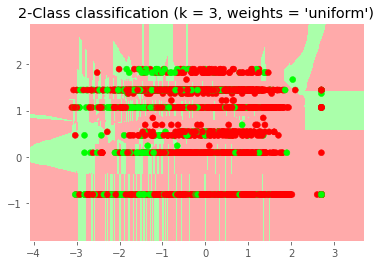

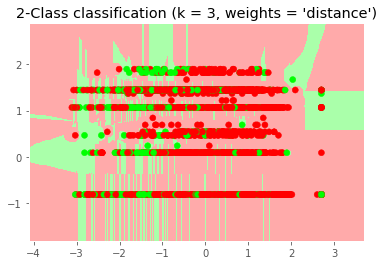

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3
h = .02  # step size in the mesh
Newx = X[:, :2]
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(Newx, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

The above graphs are showing us the normalized data that is being trained on along with the exact KNN boundaries being drawn between the two calsses. For a perfect classification all of the Red points should be in the Red highlighted regions and all of the Green points in the Green highlighted regions. As expected with a 77% accuracy, we see quite a few points in the incorrect region.

<a id="KNNME4"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 4 - KNN - EverDelinquent

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy and Precision.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For our KNN model we will analyze Accuracy and Precision. The visualizations of In-Class Accuracies and the Confusion Matrix will be analyzed to provide insight into the model, its interpretation, and usefulness.

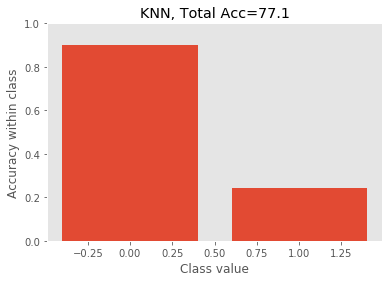

In [60]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat,title="KNN")

The above graph breaks down the class values, in our case 0 and 1 for EverDelinquent, along with their respective accuracy. We can see that KNN had an accuracy of approximately 90% in classifying loans that had never been delinquent. Also, KNN had an accuracy of approximately 25% in classifying loans that had been delinquent.

Unfortunately, this is not very useful for us as we don't as much care whether we can classify loans that had never been delinquent. Our main goal is to accurately classify the delinquent loans. This graph shows that while KNN has a fair total accuracy of 77.1%, it is not a good model for our data.

<a id="RFME3"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 3 - Random Forest - EverDelinquent

    In this section we will create our Random Forest model. Once created, we will explore how changing the 
    parameters for each model affects the model by our chosen metrics of Accuracy and Precision.
    
In this Random forest model, we are trying to create a high accuracy model capable of classifying a record whose details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime we know, into either delinquent [Everdelinquent = 1] or not delinquent [Everdelinquent =0 ], this is a very useful model that can be used by banks at the time of refinancing a loan or giving a new loan for the same borrower, the details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime for the borrower could change reguarly, so the model, if satisfactory, needs to be deployed in such a way that the it refreshes every day and the latest model needs to be used to classify/predict whether a borrower could lead to a delinquent loan.

In [61]:
%%time
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

#RandomForest+PCA

yhat = np.zeros(y.shape) # we will fill this with predictions

scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

clf_pipe = Pipeline(
    [('PCA',PCA(n_components=11, svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])

conf = mt.confusion_matrix(y,yhat)
total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)
print(conf)

Pipeline accuracy 0.8026
[[7695  318]
 [1656  331]]
Wall time: 13.5 s


For the Random Forest model we receive an Accuracy = 80% and a Precision = (7695/(7695+1656)) = 82.3%. It takes this model 13.5 seconds to complete. While this appears to be a good model we need to investigate the in-class accuracies to see if this also suffers from the same weakness as KNN.

<a id="RFME4"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 4 - Random Forest - EverDelinquent

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy and Precision.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.




For our Random Forest model we will analyze Accuracy and Precision. The visualizations of In-Class Accuracy and the Confusion Matrix will be analyzed to provide insight into the model, its interpretation, and usefulness.

Accuracy 0.8046


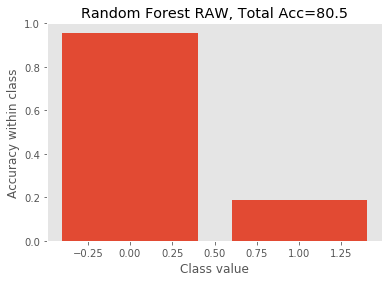

Wall time: 9.09 s


In [62]:
%%time
from sklearn.ensemble import RandomForestClassifier
#raw random forest
clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y,yhat,title="Random Forest RAW")

We can see that Random Forest produces a decent total Accuracy = 80.5% in classifying the EverDelinquent class. Unfortunately, upon deeper investigation we see that the In-Class categorization of a loan having been delinquent is actually very low at just less than 20%. The Random Forest model suffers from the same issue as KNN in that it classifies our never delinquent loans very accurately while not classifying the delinquent loans accurately.

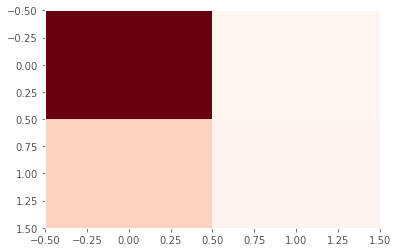

In [63]:
from sklearn import metrics as mt
# how about plotting a confusion matrix?
cm = mt.confusion_matrix(y, yhat)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)

<a id="NBME3"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 3 - Naive Bayes - EverDelinquent

    In this section we will create our Naive Bayes model. Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy and Precision.

In [64]:
#NaiveBayes+PCA

# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=11,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
  
total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)

Pipeline accuracy 0.7409


<a id="NBME4"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 4 - Naive Bayes - EverDelinquent

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy and Precision.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For our Naive Bayes model we will analyze Accuracy and Precision. The visualizations of the Confusion Matrix and In-Class Accuracy will be analyzed to provide insight into the model, its interpretation, and usefulness.

    
In this Naive Bayes model, we are trying to create a high accuracy model capable of classifying a record whose details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime we know, into either delinquent [Everdelinquent = 1] or not delinquent [Everdelinquent =0 ], this is a very useful model that can be used by banks at the time of refinancing a loan or giving a new loan for the same borrower, the details of CS,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsInRepaymentIsFirstTime for the borrower could change reguarly, so the model, if satisfactory, needs to be deployed in such a way that the it refreshes every day and the latest model needs to be used to classify/predict whether a borrower could lead to a delinquent loan.

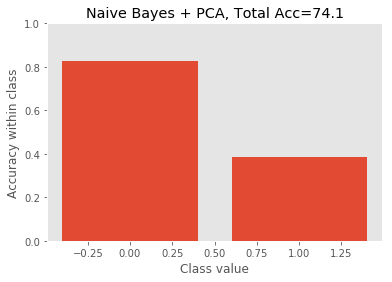

In [65]:
plot_class_acc(y,yhat,title="Naive Bayes + PCA")

[[6642 1371]
 [1220  767]]


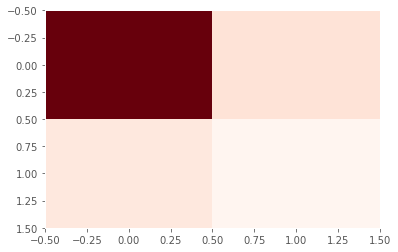

In [66]:
from sklearn import metrics as mt
# how about plotting a confusion matrix?
cm = mt.confusion_matrix(y, yhat)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)
print(cm)

From the Confusion Matrix we can see that our Naive Bayes model provides us with an Accuracy = 74.1% and a Precision = (6642/(6642+1220)) = 84.5%. From the In-Class Accuracy graph we see that Naive Bayes accurately classifies delinquent loans around 35% of the time while classifying never delinquent loans around 85% of the time for our test dataset.

Range of: -0.0278825330883 0.153405042211
0.740942427442 0.803703682004


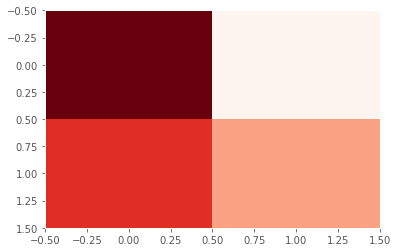

In [67]:
clf1 = Pipeline(
    [('PCA',PCA(n_components=11,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)

clf2 = Pipeline(
    [('PCA',PCA(n_components=11, svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)



from sklearn.model_selection import cross_val_score
# is clf1 better or worse than clf2?
cv=StratifiedKFold(n_splits=10)
acc1 = cross_val_score(clf1, X, y=y, cv=cv)
acc2 = cross_val_score(clf2, X, y=y, cv=cv)

#=================================

t = 2.26 / np.sqrt(10)

e = (1-acc1)-(1-acc2)
# std1 = np.std(acc1)
# std2 = np.std(acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))


#===============================
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)

<a id="LRME3C"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 3 - Logistic Regression - CreditRange

    In this section we will create our Logistic Regression model. Once created, we will explore how changing the 
    parameters for each model affects the model by our chosen metrics of Accuracy and Precision
    
New Classification task: Classify into what credit range the borrower had given all other details of an inforce / delinquent loan

In this classification task, we are trying to predict the possible credit range of the borrower at the time the loan was given.
We will try to classify a borrowers in force loan record into one out of the below 4 classes:
Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900)

The reason you might need a model like this is to use loans in force, in production to  independently calculate the credit worthiness of the borrower at the time the loan was given, it is useful in independent audits.

In [68]:
df_imputed_cs.info()
y = df_imputed_cs['MonthsDelinquent'].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9315 to 54578
Data columns (total 14 columns):
CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                10000 non-null int64
OCLTV                10000 non-null int64
DTI                  10000 non-null int64
OrigUPB              10000 non-null int64
LTV                  10000 non-null int64
OrigInterestRate     10000 non-null float64
OrigLoanTerm         10000 non-null int64
EverDelinquent       10000 non-null int64
MonthsDelinquent     10000 non-null int64
MonthsInRepayment    10000 non-null int64
IsFirstTime          10000 non-null int32
CreditRange          10000 non-null category
dtypes: category(1), float64(1), int32(1), int64(11)
memory usage: 1.0 MB


In [69]:
from sklearn.model_selection import ShuffleSplit
from statsmodels.tools import categorical

df_imputed_cs.head()
df_imputed_cs.info()

# we want to predict the X and y data as follows:

y = df_imputed_cs['CreditRange'].values # get the labels we want
print (y)
del df_imputed_cs['CreditRange'] # get rid of the class label
del df_imputed_cs['CS'] # get rid of the class label
X = df_imputed_cs.values # use everything else to predict!



    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9315 to 54578
Data columns (total 14 columns):
CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                10000 non-null int64
OCLTV                10000 non-null int64
DTI                  10000 non-null int64
OrigUPB              10000 non-null int64
LTV                  10000 non-null int64
OrigInterestRate     10000 non-null float64
OrigLoanTerm         10000 non-null int64
EverDelinquent       10000 non-null int64
MonthsDelinquent     10000 non-null int64
MonthsInRepayment    10000 non-null int64
IsFirstTime          10000 non-null int32
CreditRange          10000 non-null category
dtypes: category(1), float64(1), int32(1), int64(11)
memory usage: 1.0 MB
[1, 3, 3, 2, 1, ..., 4, 1, 4, 3, 2]
Length: 10000
Categories (4, int64): [1 < 2 < 3 < 4]
ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In this Logistic regression model, we are trying to predict the possible credit range of the borrower at the time the loan was given.
We will try to classify a borrowers in force loan record into one out of the below 4 classes:
Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900)

The independent variables for this classification task are:

CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                10000 non-null int64
OCLTV                10000 non-null int64
DTI                  10000 non-null int64
OrigUPB              10000 non-null int64
LTV                  10000 non-null int64
OrigInterestRate     10000 non-null float64
OrigLoanTerm         10000 non-null int64
EverDelinquent       10000 non-null int64
MonthsDelinquent     10000 non-null int64
MonthsInRepayment    10000 non-null int64
IsFirstTime          10000 non-null int64

In [70]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions
    print(y_hat)

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("==== Iteration",iter_num," ====")
    print("Accuracy", acc )
    print("Confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

[4 3 3 ..., 3 4 4]
==== Iteration 0  ====
Accuracy 0.369
Confusion matrix
 [[  8  27 188  34]
 [  5  45 385  82]
 [  4  44 483 162]
 [  1  13 317 202]]
[4 3 3 ..., 2 3 3]
==== Iteration 1  ====
Accuracy 0.381
Confusion matrix
 [[  9  49 162  39]
 [  7  71 327  94]
 [  7  90 439 183]
 [  0  36 244 243]]
[3 3 3 ..., 3 3 3]
==== Iteration 2  ====
Accuracy 0.36
Confusion matrix
 [[  9  10 217  23]
 [  6  22 423  92]
 [  2  24 497 147]
 [  0  11 325 192]]


After performing the three iterations of fitting the logistic regression to three different test and training sets we get very close to the same accuracy each time, approximately 37%. The LR model is doing a good job of predicting the class, in our case credit range, using the data that we provided. Around 37% of the time the LR model is properly classifying the credit range of the borrower at the time of the loan issue, into the appropriate class

<a id="LRME4C"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 4 - Logistic Regression - CreditRange

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For Logistic Regression we will analyze Accuracy of the model. The visualizations of the Confusion Matrix and the Logistic Regression Weights will be analyzed to provide insight into the model, its interpretation, and usefulness.

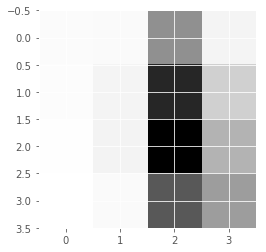

Accuracy 0.36
Confusion matrix
 [[  9  10 217  23]
 [  6  22 423  92]
 [  2  24 497 147]
 [  0  11 325 192]]


In [71]:
import matplotlib.pyplot as plt
conf = mt.confusion_matrix(y_test,y_hat)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()
print("Accuracy", acc )
print("Confusion matrix\n",conf)

The model is not doing a great job of predicting the right class, as can be seen from the above confusion matrix. The total accuracy of the model = 36%.

In [74]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [75]:
# check the accuracy on the training set
model.score(X_train, y_train)

0.37325000000000003

In [76]:
# display the intercept
print ('Intercept value: ',lr_clf.intercept_)

Intercept value:  [ -2.64488044e-05  -1.94054605e-05  -4.66559240e-06   1.36817201e-05]


In [77]:
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_imputed_cs.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

MIP has weight of 0.00478730031987
Units has weight of 3.48219281312e-05
OCLTV has weight of 0.0078355001125
DTI has weight of 0.0063332999086
OrigUPB has weight of -1.59700001956e-06
LTV has weight of 0.00783814318147
OrigInterestRate has weight of 0.000750208234361
OrigLoanTerm has weight of -0.00882569084771
EverDelinquent has weight of 0.00229283807474
MonthsDelinquent has weight of 0.0280216687258
MonthsInRepayment has weight of -0.00119103490227
IsFirstTime has weight of 6.20323553218e-05


In [78]:
# When interpreting weights, it is important to view the standard deviation and range of values that are included in the sample. 

import numpy
numpy.std(df_imputed_cs, axis=0)





MIP                     13.196405
Units                    0.185331
OCLTV                   15.298457
DTI                     11.374006
OrigUPB              53088.899781
LTV                     15.284636
OrigInterestRate         0.348108
OrigLoanTerm             2.256098
EverDelinquent           0.395119
MonthsDelinquent         8.877483
MonthsInRepayment       44.478987
IsFirstTime              0.345110
dtype: float64

In [79]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_imputed_cs.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

    



accuracy: 0.393
[[ 18  92 127  22]
 [ 16 137 307  83]
 [  5  85 412 168]
 [  2  34 273 219]]
MIP has weight of 0.0204398474312
Units has weight of 0.0137071103494
OCLTV has weight of 0.137120655843
DTI has weight of 0.0365944721123
OrigUPB has weight of -0.0305749895682
LTV has weight of 0.136110584555
OrigInterestRate has weight of 0.190364451054
OrigLoanTerm has weight of 0.00922259323571
EverDelinquent has weight of 0.42230222929
MonthsDelinquent has weight of 0.146629494882
MonthsInRepayment has weight of -0.107598642728
IsFirstTime has weight of 0.00347658810128


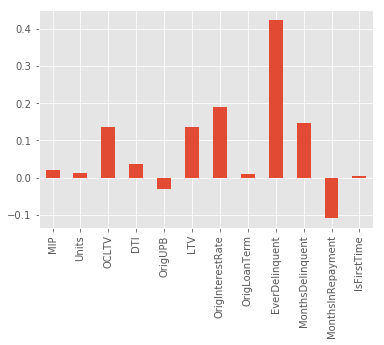

In [80]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df_imputed_cs.columns)
weights.plot(kind='bar')
plt.show()

The above chart shows the different Logistic Regression weights that have been calculated. We can see that the Everdelinquent and OrigInterestRate are the two largest contributors to classifying our response CreditRange. Both of these large contributors have a positive relationship. The only attributes with a negative relationship are OrigUPB and Monthsinrepayment. The largest contributors to CreditRange classification are Everdelinquent, OrigInterestRate, and  Monthsdelinquent variables. The Accuracy of the model is 36%.

<a id="SVMME3C"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 3 - SVM - CreditRange

    In this section we will create our SVM model. Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy.

In this SVM model, we are trying to predict the possible credit range of the borrower at the time the loan was given. We will try to classify a borrowers in force loan record into one out of the below 4 classes: Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900), Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy.

In [81]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn import svm

# train the model just as before
#svm_clf = svm.SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
# SVC with Kernel rbf or linear is taking for ever to run, hence switching to LinearSVC

svm_clf = svm.LinearSVC(C=0.5) # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

print(y_hat)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

[3 4 3 ..., 3 3 3]
accuracy: 0.388
[[ 15  96 125  23]
 [ 14 132 311  86]
 [  3  85 415 167]
 [  0  33 281 214]]


In [82]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train_scaled, y_train)  # train object
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
y_hat = clf.predict(X_test_scaled) # get test set precitions
print(y_hat)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)



[4 3 3 ..., 4 3 3]
accuracy: 0.33
[[ 30  80  98  51]
 [ 42 123 229 149]
 [ 26 110 259 275]
 [ 15  44 221 248]]


In [83]:
#Subsampling large dataset in order to attempt SVM
df_sample = df_imputed.sample(100)

from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:

    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)
df_sample.head()

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn import svm

# train the model just as before
svm_clf = svm.SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 

svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

print(y_hat)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)



ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)
[3 3 3 ..., 3 3 3]
accuracy: 0.391
[[ 23  82 137  17]
 [ 14 123 341  65]
 [  6  73 446 145]
 [  3  26 309 190]]


<a id="SVMME4C"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 4 - SVM - CreditRange

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For SVM we will analyze Accuracy. The visualizations of the Confusion Matrix and Support Vectors will be analyzed to provide insight into the model, its interpretation, and usefulness.

In [84]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.391
[[ 23  82 137  17]
 [ 14 123 341  65]
 [  6  73 446 145]
 [  3  26 309 190]]


We can see that the SVM model has an accuracy of only 39.1%.

In [85]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(7766, 12)
(7766,)
[1077 2040 2627 2022]


In [86]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_imputed.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['CreditRange'] = y[svm_clf.support_]
df_imputed['CreditRange'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7766 entries, 183810 to 193035
Data columns (total 12 columns):
CS                   7766 non-null int64
MIP                  7766 non-null int64
Units                7766 non-null int64
OCLTV                7766 non-null int64
DTI                  7766 non-null int64
OrigUPB              7766 non-null int64
LTV                  7766 non-null int64
OrigInterestRate     7766 non-null float64
OrigLoanTerm         7766 non-null int64
MonthsInRepayment    7766 non-null int64
IsFirstTime          7766 non-null int32
CreditRange          7766 non-null category
dtypes: category(1), float64(1), int32(1), int64(9)
memory usage: 705.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7766 entries, 183810 to 193035
Data columns (total 12 columns):
CS                   7766 non-null int64
MIP                  7766 non-null int64
Units                7766 non-null int64
OCLTV                7766 non-null int64
DTI                  7766 non-null int64
OrigUPB              7766 non-null int64
LTV                  7766 non-null int64
OrigInterestRate     7766 non-null float64
OrigLoanTerm         7766 non-null int64
MonthsInRepayment    7766 non-null int64
IsFirstTime          7766 non-null int32
CreditRange          7766 non-null category
dtypes: category(1), float64(1), int32(1), int64(9)
memory usage: 705.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



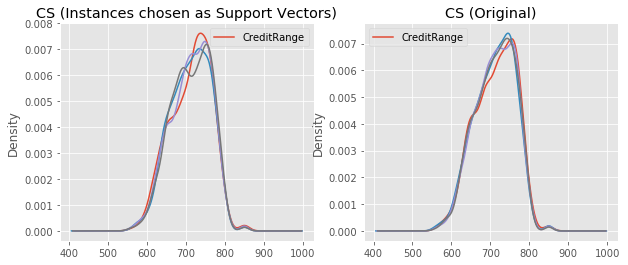

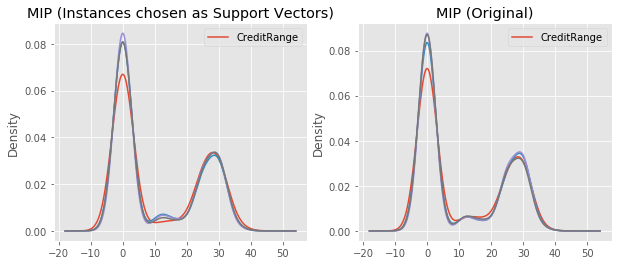

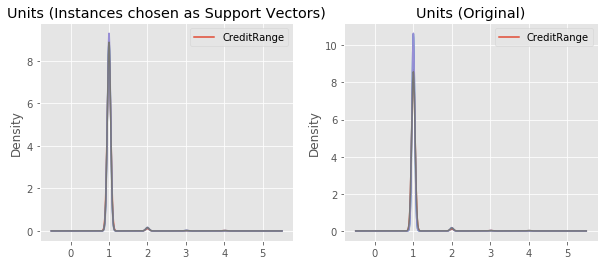

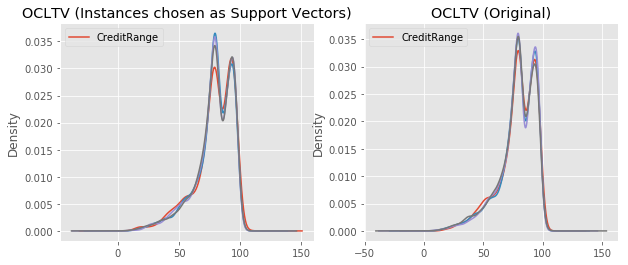

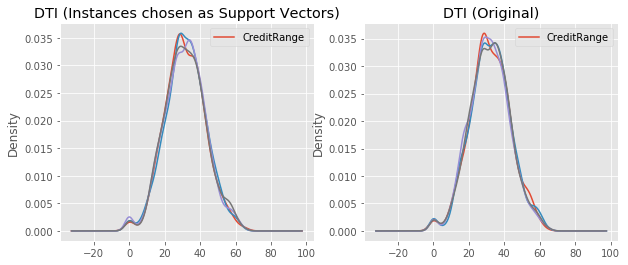

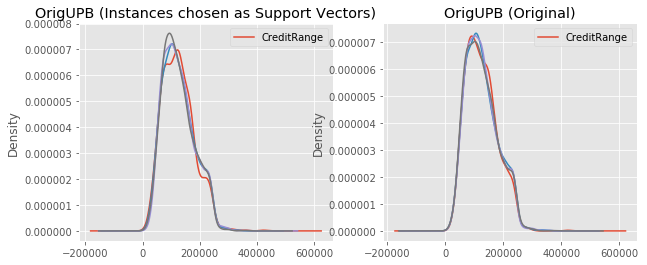

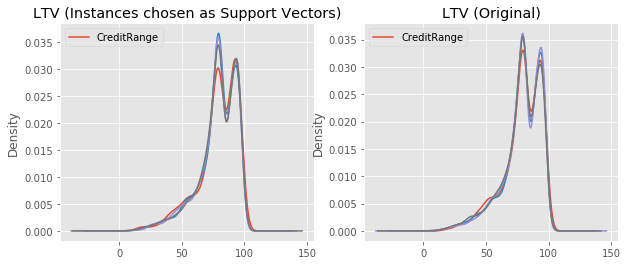

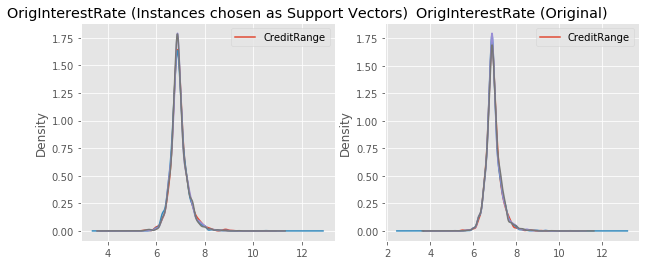

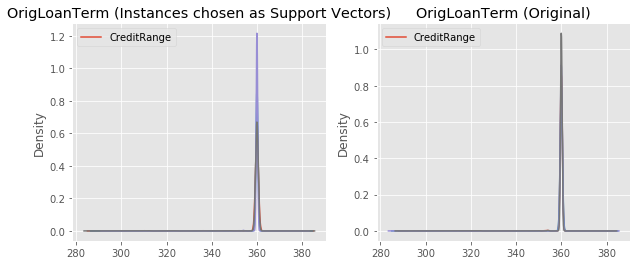

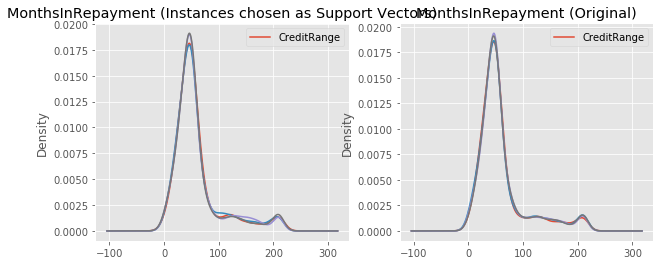

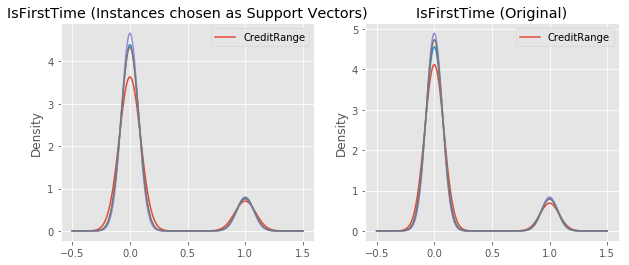

In [87]:

# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df_imputed.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['CreditRange'] = y[svm_clf.support_]
df_imputed['CreditRange'] = y # also add it back in for the original data
df_support.info()


# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['CreditRange'])
df_grouped = df_imputed.groupby(['CreditRange'])

# plot KDE of Different variables
vars_to_plot = ['CS','MIP','Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate',  'OrigLoanTerm', 'MonthsInRepayment', 'IsFirstTime']


for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['CreditRange'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['CreditRange'])
    plt.title(v+' (Original)')

We can see from the above chosen support vectors that they closely mimic the the distribution of the original data set. The chosen support vectors do not reach the maximums that the original data set does but this is expected behavior since the support vectors are acting to classify the information. Even with this, the support vectors distribution shape appears almost identical to the original data distribution for all variables. For the outcomes, we do see the usual support vector characteristic of lesser separation when compared to the original data.



The discrepancy between the support vector and original are more present possibly because the support vector is tuning into the edge cases that exist in the data and or because of classification errors in the training set.

<a id="KNNME3C"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 3 - KNN - CreditRange

In this KNN model, we are trying to predict the possible credit range of the borrower at the time the loan was given. We will try to classify a borrowers in force loan record into one out of the below 4 classes: Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900), Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy.

In [88]:
yhat = np.zeros(y.shape) # we will fill this with predictions

scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)

# get a handle to the classifier object, which defines the type
clf = KNeighborsClassifier(n_neighbors=3)

# now iterate through and get predictions, saved to the correct row in yhat
# NOTE: you can parallelize this using the cross_val_predict method
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
print ('KNN accuracy', total_accuracy)


KNN accuracy 0.3102


<a id="KNNME4C"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Modeling and Evaluation 4 - KNN - CreditRange

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy and Precision.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For our KNN model we will analyze Accuracy and Precision. The visualizations of In-Class Accuracies and the Confusion Matrix will be analyzed to provide insight into the model, its interpretation, and usefulness.

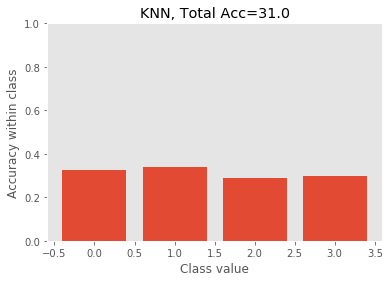

In [89]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat,title="KNN")

The KNN model has a total accuracy of 31%. Unfortunately, we can see that the within class accuracies are all below 40%. This model does not perform as we would like for it to in classifying the CreditRange.

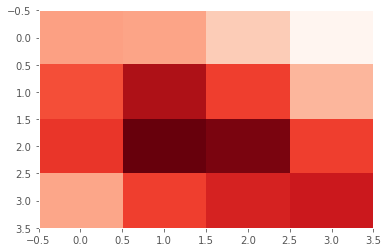

In [90]:
from sklearn import metrics as mt
# how about plotting a confusion matrix?
cm = mt.confusion_matrix(y, yhat)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)

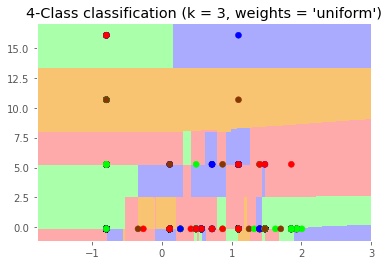

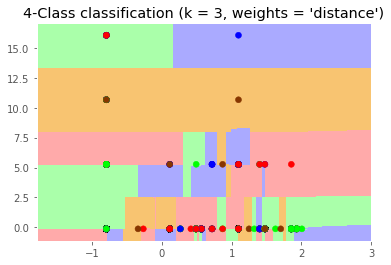

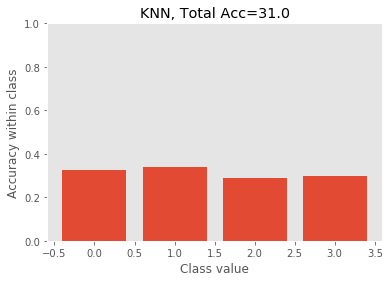

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3
h = .02  # step size in the mesh
Newx = X[:, :2]
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#F8C471'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF',  '#873600'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(Newx, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
    
plot_class_acc(y,yhat,title="KNN")

KNN model accuracy of classifiying a borrowers details correctly into credit range at the time of issue of the loan is  31% 

The above graphs are showing us the normalized data that is being trained on along with the exact KNN boundaries being drawn between the two classes in the class boundary diagram

For a perfect classification all of the Red points should be in the Red highlighted regions and all of the Green points in the Green highlighted regions and son. As expected with a 31% accuracy, we see quite a few points in the incorrect region.

The bar graph depicts the accuracy within class of the KNN classification for credit score.

<a id="RFME3C"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 3 - Random Forest - CreditRange

    In this section we will create our Random Forest model. Once created, we will explore how changing the 
    parameters for each model affects the model by our chosen metrics of Accuracy.
    
In this Random forest classification model, we are trying to predict the possible credit range of the borrower at the time the loan was given. We will try to classify a borrowers in force loan record into one out of the below 4 classes: Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900), Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy.

Initially, we will try a Random forest + PCA pipeline, followed by only raw random forest.

<a id="RFME4C"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 4 - Random Forest - CreditRange

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy. Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For our Random Forest model we will analyze Accuracy. The visualizations of In-Class Accuracy and the Confusion Matrix will be analyzed to provide insight into the model, its interpretation, and usefulness.

Pipeline accuracy 0.37


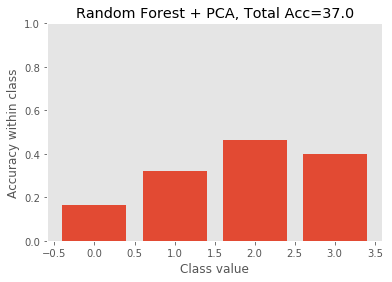

Wall time: 13.4 s


In [92]:
%%time
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

#RandomForest+PCA
yhat = np.zeros(y.shape) # we will fill this with predictions
scl = StandardScaler()
X = scl.fit_transform(X)

# create cross validation iterator
cv = StratifiedKFold(n_splits=10)
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=11, svd_solver='randomized')),
     ('CLF',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test]) 
total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(y,yhat,title="Random Forest + PCA")

The Random Forest + PCA model gives us only a 37% accuracy. We once again see that the within class accuracies are low as the other models were. The model completed in 13.4 seconds.

Accuracy 0.3647


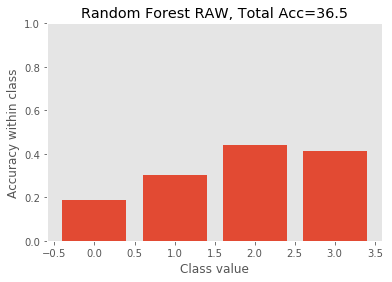

Wall time: 10.6 s


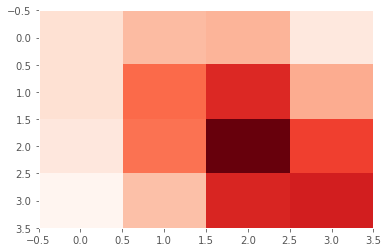

In [93]:
%%time
from sklearn.ensemble import RandomForestClassifier
#raw random forest
clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf.fit(X[train],y[train])
    yhat[test] = clf.predict(X[test])
    
total_accuracy = mt.accuracy_score(y, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y,yhat,title="Random Forest RAW")

from sklearn import metrics as mt
# how about plotting a confusion matrix?
cm = mt.confusion_matrix(y, yhat)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)

<a id="NBME3C"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 3 - Naive Bayes - CreditRange

    In this section we will create our Naive Bayes model. Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy.

In this Naive Bayes classification model, we are trying to predict the possible credit range of the borrower at the time the loan was given. We will try to classify a borrowers in force loan record into one out of the below 4 classes: Poor (0-650), Fair (650-700), Good (700-750), Excellent (750-900), Once created, we will explore how changing the parameters for each model affects the model by our chosen metrics of Accuracy.

In [94]:
from sklearn.naive_bayes import GaussianNB
# setup pipeline to take PCA, then fit a different classifier
clf_pipe = Pipeline(
    [('PCA',PCA(n_components=11,svd_solver='randomized')),
     ('CLF',GaussianNB())]
)
# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv.split(X,y):
    clf_pipe.fit(X[train],y[train])
    yhat[test] = clf_pipe.predict(X[test])
total_accuracy = mt.accuracy_score(y, yhat)
print ('Pipeline accuracy', total_accuracy)

Pipeline accuracy 0.3712


<a id="NBME4C"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 4 - Naive Bayes - CreditRange

    In this section we analyze our obtained results from the previous section using our chosen evaluation metrics of 
    Accuracy.  Also, we will provide and explain visualizations that help in understanding why our 
    model is or is not useful for our dataset.

For our Naive Bayes model we will analyze Accuracy. The visualizations of the Confusion Matrix and In-Class Accuracy will be analyzed to provide insight into the model, its interpretation, and usefulness.

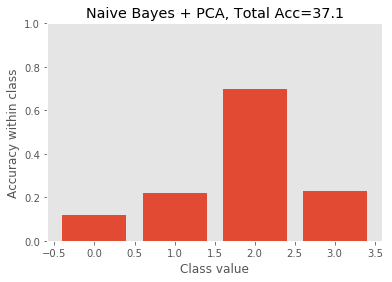

[[ 160  419  670   87]
 [ 206  568 1645  174]
 [ 128  459 2375  434]
 [  71  242 1753  609]]


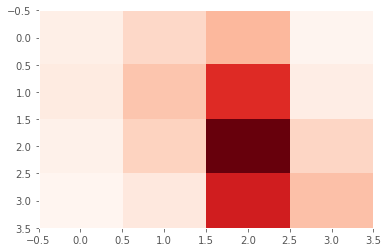

In [95]:
plot_class_acc(y,yhat,title="Naive Bayes + PCA")
from sklearn import metrics as mt
cm = mt.confusion_matrix(y, yhat)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.grid(False)
print(cm)

Our Naive Bayes + PCA model has a total accuracy of 37.1%. This models highest within class accuracy is around 70% and the next highest is around 25%. Unfortunately, this model does not perform well for predicting the class of CreditRange.

<a id="ME5"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 5


#### EverDelinquent Classification Models

The below table summarizes our findings on the different models that we completed for our classification of EverDelinquent.

| Model | Accuracy | Precision
| :- | :- | :-
| Logistic Regression | 80.5% | 81.8% 
| SVM | 80.7% | 81.7% 
| KNN | 77.2% | 81.0% 
| Random Forest | 80.0% | 82.3%
| Naive Bayes | 74.1% | 84.5%

Using the table above and strictly looking at our performance evaluation metrics of Accuracy and Precision we can eliminate KNN and Naive Bayes as models since the both have the lowest Accuracy. This leaves us with Logistic Regression, SVM, and Random Forest. Previously we noted that Random Forest had an issue with In-Class Accuracy where the model did not classify our delinquent loans (EverDelinquent = 1) very well with only 20% accuracy. This eliminates Random Forest as a potential model for our data.

This leaves us with Logistic Regression and SVM both of which have an Accuracy around 80% and Precision around 82%. Either of these models works well with our data on classifying the EverDelinquent response.

#### CreditRange Classification Models

The below table summarizes our findings on the different models that we completed for our classification of CreditRange.

| Model | Accuracy
| :- | :- 
| Logistic Regression | 36.0%
| SVM | 39.1% 
| KNN | 31.0%
| Random Forest | 37.0%
| Naive Bayes | 37.1%

We can see from the provided table that none of our models performed well when attempting to classify the CreditRange and it's classes. Taking a practical approach to interpreting these results, we can see that it does not always make sense to be able to classify a persons Credit Score with the data that we collected. There are many confounding factors such as a persons relationship to the bank or banker, among others, that may lead to a mortgage loan that were not accounted for in our data set.

If we want to continue to attempt to classify the CreditRange then we would need to approach this research from a fresh look on what information should we be collecting in the first place so that we can produce a working model.

<a id="ME5r"></a>
<a href="#index">Back to Index</a>
### M&E 5: Resubmission
    Feedback: "Is the difference significant with 95% confidence?" Use proper statistical comparison methods. You must use statistical comparison techniques - be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course."
    
For model comparison we are assuming that our models data is following a Gaussian distribution. Also, the null hypothesis that we are using to compare our models below is "Are the models means different from one another?". If the confidence intervals we calculate below contain zero then we fail to reject the null hypothesis, meaning that the models are not statistically significantly different from one another. If the confidence intervals do not contain zero then we can reject the null hypothesis and conclude that the models are different from one another, because their means are different, and then use our parameter of Accuracy to conclude which model is a better fit.

Below is a summary table of the different models and the accuracy in classifying CreditRange (CR) and EverDelinquent (ED). We also calculated the variance and confidence intervals for both. Note, for calculating the variance we are assuming the same N for the test data, 233160.

| Model | CR Acc | CR Error | CR Var | ED Acc | ED Error | ED Var
| :- | :- | :- | :- | :- | :- | :-
| Logistic Regression | 36.0% | 0.2304 | 0.000000988 | 80.5% | 0.156975 | 0.000000673
| SVM | 39.1% | 0.238119 | 0.000001020 | 80.7% | 0.155751 | 0.000000668
| KNN | 31.0% | 0.2139 | 0.000000917 | 77.2% | 0.176016 | 0.000000754
| Random Forest | 37.0% | 0.2331 | 0.000000999 | 80.0% | 0.16 | 0.000000686
| Naive Bayes | 37.1% | 0.233359 | 0.000001000 | 74.1% | 0.191919 | 0.000000823

#### Confidence Intervals for Model Comparison of CreditRange:

| Models | Logistic Regression | SVM | KNN | Random Forest | Naive Bayes
| :- | :---: | :---: | :---: | :---: | :---:
| Logistic Regression | - | - | - | - | -
| SVM | [-0.00494, 0.01049] | - | - | - | -
| KNN | [ 0.01379,  0.01921] | [0.0215, 0.0269] | - | - | -
| Random Forest | [-0.00546, 0.00006] | [0.0047, 0.0053] | [-0.0219, -0.0164] | - | -
| Naive Bayes | [-0.00570, -0.00020] | [0.0019, 0.0075] | [-0.0221, -0.0167] | [-0.003, 0.002] | -

Referencing the above table we find that the models that are 95% statistically significantly different from one another (their CI's do not contain 0) are:
* Logistic Regression and KNN
* Logistic Regression and Naive Bayes
* SVM and KNN
* SVM and Random Forest
* SVM and Naive Bayes
* KNN and Random Forest
* KNN and Naive Bayes

For CreditRange, selecting the highest accuracy models from the above combinations yields highest two models to be SVM and Logistic Regression.

#### Confidence Intervals for Model Comparison of EverDelinquent:

| Models | Logistic Regression | SVM | KNN | Random Forest | Naive Bayes
| :- | :---: | :---: | :---: | :---: | :---:
| Logistic Regression | - | - | - | - | -
| SVM | [-0.001, 0.003] | - | - | - | -
| KNN | [-0.021, -0.016] | [-0.022, -0.017] | - | - | -
| Random Forest | [-0.005, -0.001] | [-0.006, -0.001] | [0.013, 0.018] | - | -
| Naive Bayes | [-0.037, -0.032] | [-0.038, -0.033] | [-0.018, -0.013] | [-0.034, -0.029] | -

Referencing the above table we find that the models that are 95% statistically significantly different from one another (their CI's do not contain 0) are:
* Logistic Regression and KNN
* Logistic Regression and Random Forest
* Logistic Regression and Naive Bayes
* SVM and KNN
* SVM and Random Forest
* SVM and Naive Bayes
* KNN and Random Forest
* KNN and Naive Bayes
* Random Forest and Naive Bayes

For EverDelinquent, selecting the highest accuracy models from the above combinations yields the best model to be SVM and Logistic Regression.

We can conclude with 95% confidence that the best model for our data set is SVM as it has a higher Accuracy in classifying both CreditRange and EverDelinquent.

<a id="ME6"></a>
<a href="#index">Back to Index</a>
# Modeling and Evaluation 6

All of our models are classification models and not regression / prediction models. The accepted standard for these models for statistically significant comparison of them is Accuracy and Precision. We have used both of these metrics for all of our models as outlined in the previous sections tables.

Now that we have narrowed down our models to the Logistic Regression and SVM models, let's discuss the attributes that contributed the most to both models respectively. 

For our Logistic Regression model, we identified previously that the largest contributors to the model, via their weightings, are the MonthsInRepayment and CS (CreditScore) attributes. Also, we should note that these two attributes weights were much larger in magnitude than any of the other weights for the remaining attributes. This shows us that the Logistic Regression model heavily relies upon MonthsInRepayment and CreditScore associated with the mortgage.

For our SVM model, we identified that the largest contributors to the model, via their support vectors, are the attributes of MonthsInRepayment and DTI (Debt-to-Income ratio). 

<a id="ME6r"></a>
<a href="#index">Back to Index</a>
### M&E 6: Resubmission
    Feedback: You only look at feature importance for LR and SVM. There is no discussion about over all feature importance for other models and no comparison for all the models overall.
    
As we can see from the "M&E 5: Resubmission" section, the best models, with a 95% confidence, are SVM then Logistic Regression. The reason that we only discussed these two models was due to the fact that all of our models had the same amount of data used to evaluate them, 233160 rows. Given the confidence interval equation we can see that that the variance is built from the error rate and the population used. We previously could use only the comparison of Accuracy due to the models being compared on the same population. The CI calculation is only influenced by our accuracy which creates the error rate since our population remains unchanged between models.

After creating the Confidence Intervals for each model comparison we arrive at the same conclusion that SVM and Logistic Regression are the best models. Hence, we only discussed the feature importance for SVM and Logistic Regression. These models are the most important and have the highest accuracy in classifying our important features of CreditRange and the EverDelinquent response.

<a id="Dep"></a>
<a href="#index">Back to Index</a>
# Deployment

The Logistic Regression and SVM models are not only important to mortgage companies but also to the government. These models show how important an applicants Credit Score and Debt-to-Income ratio are to the success or failure of a mortgage. As most of us experienced and lived through the 2007-2008 housing market crash, we remember that the lax standards of banks, mortgage providers, and underwriters led to inevitable default of the mortgage market. In the years leading up to the housing market crash, banks had become very relaxed in their standards of writing a mortgage such that Credit Scores and DTI requirements were not as stringent. What happened was that these banks made loans to people who, with stricter requirements, would not have been able to obtain them. Eventually, the metrics caught up with reality and the people who were paying on the mortgages they should not have been able to obtain were all of a sudden unable to make the payments. Through other bank malfeasance, selling and re-selling the same mortgages packaged differently and hedging their bets incorrectly, this issue turned into a cascade effect which disrupted the entire mortgage market.

Our models are very much a confirmation of previously accepted wisdom in the mortgage marketplace. You have a higher risk of default when you make a loan to an individual with a worse Credit Score and a higher DTI. This also makes sense when we consider the individual. If an individual is running their finances on thinner margins it takes less to create a disruption in their ability to make payments versus an individual that has less overhead (DTI).

Also, we have the MonthsInRepayment attribute contributing heavily to our Logistic Regression and SVM models. Once more this fits the narrative as we would expect that as time goes there exists a higher risk of a delinquency. This is mainly due to macro economic trends such as the job market. With loans being on average 20-30 years, many recessions can take place in that timeframe. As time goes on and the mortgage gets older the individual paying on that mortgage may experience a job loss, health issues, or any other circumstance that may cause them to miss a mortgage payment.

This model can easily be deployed for banks or mortgage companies simply by aggregating the data that they already have on existing loans. The attributes that we collected from Freddie Mac are readily available in the industry. If a company were to implement these models then we can measure their effectiveness in the same manner using Accuracy, Precision, and In-Class Accuracy. A company may have a hard time in the future on classifying whether a loan went into delinquency since the implementation of this model would almost certainly mean that any mortgages flagged as likely to go into delinquency would be repackaged and sold of to another bank, mortgage company, or hedgefund. It would be difficult to track down that loan in the future after being sold.

A company could effectively build a mortgage trading strategy around our models. Since we can show that roughly 80% of all of the loans were classified properly we could then focus on just the delinquent loans. We could then identify other important metrics around these loans such as their average age before delinquency and a distribution of their ages for those that become delinquent. The company could then always sell off the mortgages once they reach a certain age and buy and hold those that were under a certain age. This would minimize the companies risk of not receiving a payout on the mortgage and would allow the company to run on a leaner business model as they would not need as much overhead for dealing with delinquencies.

Additional data that could be collected on our dataset would mainly be attributes about the main individual applying for the mortgage. Metrics such as monthly free cash flow, spending habits, the individuals health, the industry they work in, and/or the year they were born / generation they belong to would allow us to get a better gauge on the confounding factors that exist due to the macro economy at work. Perhaps a person working in the healthcare industry and having held the same job may have a lower risk of being delinquent versus an individual that worked in a highly seasonal or cyclic industry and changed jobs frequently would have of being delinquent. There are many confounding factors to consider for this data and much research can be accomplished here.

<a id="EW"></a>
<a href="#index">Back to Index</a>
# Exceptional Work

For our exceptional work we decided to include two more models for evaluation, as only three were required. On top of the required SVM, Random Forest, and Naive Bayes we included Logistic Regression and KNN for a total of 5 models. We also ran these additional models on both the test and training sets which gives us a total of 10 runs instead of the required 6. Also, we tried to predict MonthsDelinquent using a Regression model. You may see the appropriate sections for our exceptional work below:
    
* <a href="#LRME3">Modeling and Evaluation 3 - Logistic Regression - EverDelinquent</a>
* <a href="#LRME4">Modeling and Evaluation 4 - Logistic Regression - EverDelinquent</a>
* <a href="#LRME3C">Modeling and Evaluation 3 - Logistic Regression - CreditRange</a>
* <a href="#LRME4C">Modeling and Evaluation 4 - Logistic Regression - CreditRange</a>
* <a href="#KNNME3">Modeling and Evaluation 3 - KNN - EverDelinquent</a>
* <a href="#KNNME4">Modeling and Evaluation 4 - KNN - EverDelinquent</a>
* <a href="#KNNME3C">Modeling and Evaluation 3 - KNN - CreditRange</a>
* <a href="#KNNME4C">Modeling and Evaluation 4 - KNN - CreditRange</a>
* <a href="#EWR">Exceptional Work - Regression</a>

<a id="EWR"></a>
<a href="#index">Back to Index</a>
<br><br><a href="#EW">Back to Exceptional Work</a>
# Exceptional Work - Regression

In this section we will take a look at all the regression tasks we are attempting, we will be attempting to predict the value of MonthsDelinquent based on 

CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                10000 non-null int64
OCLTV                10000 non-null int64
DTI                  10000 non-null int64
OrigUPB              10000 non-null int64
LTV                  10000 non-null int64
OrigInterestRate     10000 non-null float64
OrigLoanTerm         10000 non-null int64
EverDelinquent       10000 non-null int64
MonthsInRepayment    10000 non-null int64
IsFirstTime          10000 non-null int64

We will be using Linear regression, KNN regression, Random forest regression, SVM regression and comparing their R Squared values too.

In [96]:
df_imputed_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 120453 to 115282
Data columns (total 13 columns):
CS                   10000 non-null int64
MIP                  10000 non-null int64
Units                10000 non-null int64
OCLTV                10000 non-null int64
DTI                  10000 non-null int64
OrigUPB              10000 non-null int64
LTV                  10000 non-null int64
OrigInterestRate     10000 non-null float64
OrigLoanTerm         10000 non-null int64
EverDelinquent       10000 non-null int64
MonthsDelinquent     10000 non-null int64
MonthsInRepayment    10000 non-null int64
IsFirstTime          10000 non-null int32
dtypes: float64(1), int32(1), int64(11)
memory usage: 1.0 MB


Fit a model X_train and calculate MSE with Y_train 48.7955959348
Fit a model X_train and calculate MSE with X_test, Y_test 65.9133809491
Coefficients: 
 [ -1.17691262e-02  -1.57007204e-03  -5.32960089e-01   3.33924658e-03
   4.46520092e-03   1.00626070e-06   1.12401932e-02   8.70629379e-01
  -1.45248923e-02   6.94496215e+00   4.18972512e-02  -1.85100756e-01]
Coefficients: 
 4.57046962918
Mean squared error: 65.91
Variance score: 0.23


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



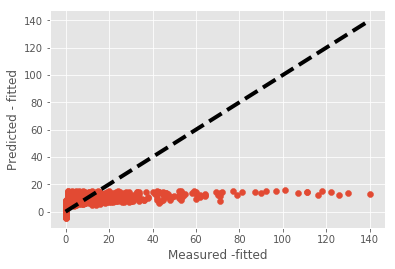

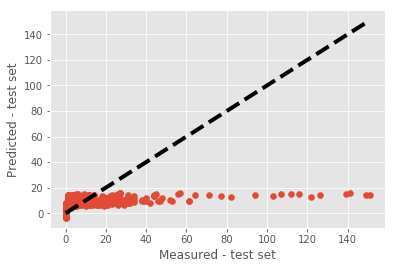

Fitted R^2 from training data 0.238598815497
Actual R^2 from test data 0.228633345229


In [97]:
#Linear Regression
from sklearn import linear_model
from sklearn import cross_validation
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y = df_imputed_reg['MonthsDelinquent'].values # get the labels we want
del df_imputed_reg['MonthsDelinquent'] # get rid of the class label
X = df_imputed_reg.values # use everything else to predict!

# Using 66% to train, 33% to test
Xtrain, Xtest, ytrain, ytest = cross_validation.train_test_split(X, y, test_size= .33, random_state =5)
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain,ytrain)
predictionstrain = lm.predict(Xtrain)
predictionstest = lm.predict(Xtest)
A= np.mean((ytrain - lm.predict(Xtrain)) ** 2)
B= np.mean((ytest - lm.predict(Xtest)) ** 2)
print ('Fit a model X_train and calculate MSE with Y_train', A )
print ('Fit a model X_train and calculate MSE with X_test, Y_test', B )

# The coefficients
print('Coefficients: \n', lm.coef_)
print('Coefficients: \n', lm.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((lm.predict(Xtest) - ytest) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(Xtest, ytest))
fig, ax = plt.subplots()
ax.scatter(ytrain, predictionstrain)
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'k--', lw=4)
ax.set_xlabel('Measured -fitted')
ax.set_ylabel('Predicted - fitted')
plt.show()

fig, ay = plt.subplots()
ay.scatter(ytest, predictionstest)
ay.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ay.set_xlabel('Measured - test set')
ay.set_ylabel('Predicted - test set')
plt.show()
print ( 'Fitted R^2 from training data' , r2_score(ytrain, lm.predict(Xtrain))  )
print ( 'Actual R^2 from test data' , r2_score(ytest, lm.predict(Xtest))  )

As we can observe from above, at the time of fitting the linear regression model itself, the linear regression model could only be fit to a rSquared value of around .23, the coefficients and intercept of which are above, and when we tested the test set against it, the rSquared was similar, around .24, this is not a highly useful model, looking at the measured vs predicted test set

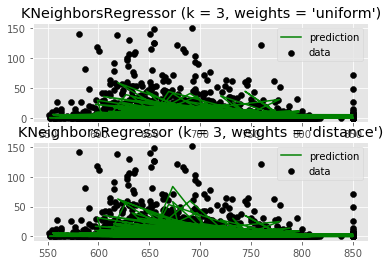

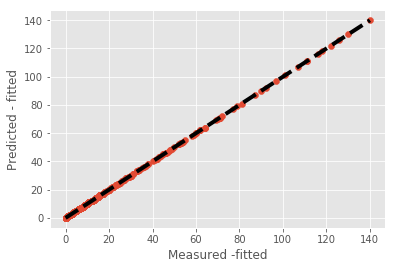

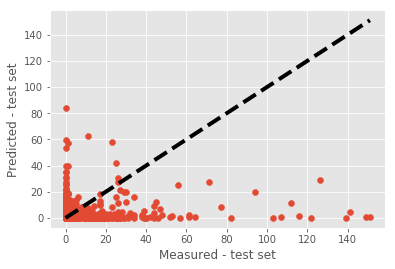

Fitted R^2 from training data 1.0
Actual R^2 from training data -0.0702621062581


In [98]:
#KNN Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

n_neighbors = 3

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    predictionstrain = knn.fit(Xtrain, ytrain).predict(Xtrain)
    y_ = knn.fit(Xtrain, ytrain).predict(Xtest)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X[:,0], y, c='k', label='data')
    plt.plot(Xtest[:,0], y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))
plt.show()

fig, ax = plt.subplots()
ax.scatter(ytrain, predictionstrain)
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'k--', lw=4)
ax.set_xlabel('Measured -fitted')
ax.set_ylabel('Predicted - fitted')
plt.show()

fig, ay = plt.subplots()
ay.scatter(ytest,  y_)
ay.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ay.set_xlabel('Measured - test set')
ay.set_ylabel('Predicted - test set')
plt.show()

print ( 'Fitted R^2 from training data' , r2_score(ytrain, predictionstrain)  )
print ( 'Actual R^2 from training data' , r2_score( ytest, y_)  )

As we can observe from above, at the time of fitting the KNN regression model itself, the KNN model was actually fit to a rSquared value of 1!, and when we tested the test set against it, the rSquared was much lesser, around .024, this is not a highly useful model, looking at the measured vs predicted test set and the predicted vs actual data graphs above

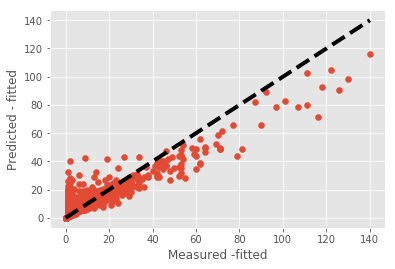

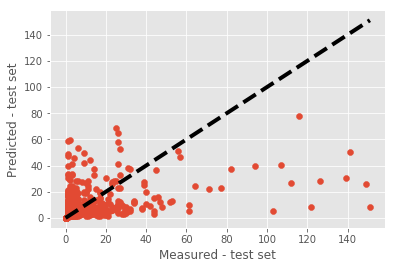

Fitted R^2 from training data 0.883281814468
Actual R^2 from tested data 0.275595646348


In [99]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  
from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(n_estimators=20, min_samples_split=2)
model = regressor.fit(Xtrain, ytrain)

predictionstrain = regressor.predict(Xtrain)
predictionstest = regressor.predict(Xtest)


fig, ax = plt.subplots()
ax.scatter(ytrain, predictionstrain)
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'k--', lw=4)
ax.set_xlabel('Measured -fitted')
ax.set_ylabel('Predicted - fitted')
plt.show()

fig, ay = plt.subplots()
ay.scatter(ytest,  predictionstest)
ay.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ay.set_xlabel('Measured - test set')
ay.set_ylabel('Predicted - test set')
plt.show()


from sklearn.metrics import r2_score
print ('Fitted R^2 from training data' , r2_score(ytrain, predictionstrain))  
print ('Actual R^2 from tested data' , r2_score(ytest, predictionstest))  


As we can observe from above, at the time of fitting the random forest regression model itself, the random forest regression model was actually fit to a rSquared value of .89, and when we tested the test set against it, the rSquared was much lesser, around .26, this is not a highly useful model, looking at the measured vs predicted test set and the predicted vs actual data graphs above

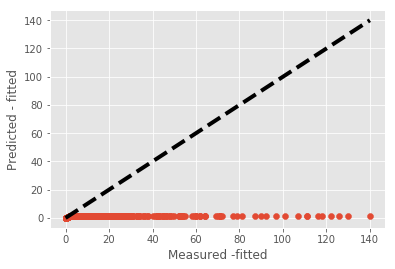

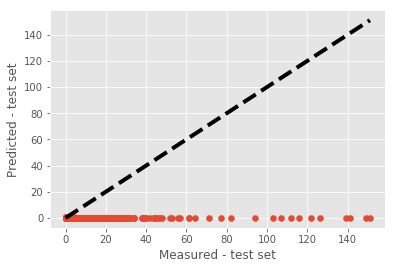

Fitted R^2 from training data 0.0186823256281
Actual R^2 from tested data -0.0273750245445


In [100]:
from sklearn import svm
svlf = svm.SVR()
model = svlf.fit(Xtrain, ytrain)
predictionstrain = svlf.predict(Xtrain)
predictionstest = svlf.predict(Xtest)
fig, ax = plt.subplots()
ax.scatter(ytrain, predictionstrain)
ax.plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'k--', lw=4)
ax.set_xlabel('Measured -fitted')
ax.set_ylabel('Predicted - fitted')
plt.show()
fig, ay = plt.subplots()
ay.scatter(ytest,  predictionstest)
ay.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ay.set_xlabel('Measured - test set')
ay.set_ylabel('Predicted - test set')
plt.show()
from sklearn.metrics import r2_score
print ('Fitted R^2 from training data' , r2_score(ytrain, predictionstrain))  
print ('Actual R^2 from tested data' , r2_score(ytest, predictionstest))  

As we can observe from above, at the time of fitting the random forest regression model itself, the svm regression model was  fit to a rSquared value of .015, and when we tested the test set against it, the rSquared was much lesser, around -.03, this is not a  useful model at all, looking at the measured vs predicted test set and the predicted vs actual data graphs above

From all of the above regression methods, we can arrive at a conclusion that for this data fitting a model that can predic the value of months that a potential borrower could be delinquent upto, is a difficult task and the best model we could come up with for it was a random forest regression model with a rSquared value of around .27

<a id="Ref"></a>
<a href="#index">Back to Index</a>
# References

In completing our work we referenced the course notebooks and scikit learn documentation located below.
* https://github.com/eclarson/DataMiningNotebooks
* http://scikit-learn.org/stable/supervised_learning.html#supervised-learning